In [ ]:
# Import Libraries
import itertools
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
!pip install catboost
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [ ]:
# Loading the datasets
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")
submission_df = pd.read_csv("/content/sample_submission.csv")

In [ ]:
# Exploring The Dataset
df = train_df.copy()
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0       842302         M       17.990        10.380         122.800   1001.000            0.118             0.278           0.300                0.147          0.242                   0.079      1.095       0.905         8.589  153.400          0.006           0.049         0.054              0.016        0.030                 0.006        25.380         17.330          184.600    2019.000             0.162              0.666            0.712                 0.265           0.460   
1       842517         M       20.570        17.770         132.900   1326.000            0.085             0.079           0.087                0.070          0.181                   0.057      0.543       0.734         3.398   74.080          0.005           0.013         0.019              0.013        0.014                 0.004        24.990         23.410          158.800    1956.000             0.124              0.187            0.242                 0.186           0.275   
2     84300903         M       19.690        21.250         130.000   1203.000            0.110             0.160           0.197                0.128          0.207                   0.060      0.746       0.787         4.585   94.030          0.006           0.040         0.038              0.021        0.022                 0.005        23.570         25.530          152.500    1709.000             0.144              0.424            0.450                 0.243           0.361   
3     84348301         M       11.420        20.380          77.580    386.100            0.142             0.284           0.241                0.105          0.260                   0.097      0.496       1.156         3.445   27.230          0.009           0.075         0.057              0.019        0.060                 0.009        14.910         26.500           98.870     567.700             0.210              0.866            0.687                 0.258           0.664   
4     84358402         M       20.290        14.340         135.100   1297.000            0.100             0.133           0.198                0.104          0.181                   0.059      0.757       0.781         5.438   94.440          0.011           0.025         0.057              0.019        0.018                 0.005        22.540         16.670          152.200    1575.000             0.137              0.205            0.400                 0.163           0.236   
5       843786         M       12.450        15.700          82.570    477.100            0.128             0.170           0.158                0.081          0.209                   0.076      0.335       0.890         2.217   27.190          0.008           0.033         0.037              0.011        0.022                 0.005        15.470         23.750          103.400     741.600             0.179              0.525            0.535                 0.174           0.399   
6       844359         M       18.250        19.980         119.600   1040.000            0.095             0.109           0.113                0.074          0.179                   0.057      0.447       0.773         3.180   53.910          0.004           0.014         0.023              0.010        0.014                 0.002        22.880         27.660          153.200    1606.000             0.144              0.258            0.378                 0.193           0.306   
7     84458202         M       13.710        20.830          90.200    577.900            0.119             

In [ ]:
print(f'The shape of train data is: \n', df.shape)

The shape of train data is: 
 (389, 32)


In [ ]:
print(f'The shape of test data is: \n', test_df.shape)

The shape of test data is: 
 (180, 31)


In [ ]:
print(f'Data types of train data is: \n', df.dtypes)

Data types of train data is: 
 id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst       

In [ ]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0    842302         M       17.990        10.380         122.800   1001.000            0.118             0.278           0.300                0.147          0.242                   0.079      1.095       0.905         8.589  153.400          0.006           0.049         0.054              0.016        0.030                 0.006        25.380         17.330          184.600    2019.000             0.162              0.666            0.712                 0.265           0.460   
1    842517         M       20.570        17.770         132.900   1326.000            0.085             0.079           0.087                0.070          0.181                   0.057      0.543       0.734         3.398   74.080          0.005           0.013         0.019              0.013        0.014                 0.004        24.990         23.410          158.800    1956.000             0.124              0.187            0.242                 0.186           0.275   
2  84300903         M       19.690        21.250         130.000   1203.000            0.110             0.160           0.197                0.128          0.207                   0.060      0.746       0.787         4.585   94.030          0.006           0.040         0.038              0.021        0.022                 0.005        23.570         25.530          152.500    1709.000             0.144              0.424            0.450                 0.243           0.361   
3  84348301         M       11.420        20.380          77.580    386.100            0.142             0.284           0.241                0.105          0.260                   0.097      0.496       1.156         3.445   27.230          0.009           0.075         0.057              0.019        0.060                 0.009        14.910         26.500           98.870     567.700             0.210              0.866            0.687                 0.258           0.664   
4  84358402         M       20.290        14.340         135.100   1297.000            0.100             0.133           0.198                0.104          0.181                   0.059      0.757       0.781         5.438   94.440          0.011           0.025         0.057              0.019        0.018                 0.005        22.540         16.670          152.200    1575.000             0.137              0.205            0.400                 0.163           0.236   

   fractal_dimension_worst  
0                    0.119  
1                    0.089  
2                    0.088  
3                    0.173  
4                    0.077

In [ ]:
df.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
384  902727         B       13.280        13.720          85.790    541.800            0.084             0.086           0.051                0.029          0.162                   0.056      0.183       0.531         1.592   15.260          0.004           0.021         0.028              0.008        0.015                 0.003        14.240         17.370           96.590     623.700             0.117              0.269            0.287                 0.092           0.274   
385   90291         M       14.600        23.290          93.970    664.700            0.087             0.066           0.084                0.053          0.163                   0.054      0.416       1.627         2.914   33.010          0.008           0.017         0.034              0.016        0.017                 0.003        15.790         31.710          102.200     758.200             0.131              0.158            0.268                 0.136           0.248   
386  902975         B       12.210        14.090          78.780    462.000            0.081             0.078           0.068                0.025          0.165                   0.062      0.267       0.831         2.097   19.960          0.004           0.030         0.043              0.011        0.019                 0.005        13.130         19.290           87.650     529.900             0.103              0.243            0.308                 0.091           0.268   
387  902976         B       13.880        16.160          88.370    596.600            0.070             0.048           0.020                0.009          0.161                   0.055      0.254       0.622         1.709   23.120          0.004           0.014         0.020              0.007        0.016                 0.002        15.510         19.970           99.660     745.300             0.085              0.123            0.109                 0.045           0.254   
388  903011         B       11.270        15.500          73.380    392.000            0.084             0.111           0.101                0.028          0.181                   0.073      0.331       1.067         2.569   22.970          0.010           0.067         0.095              0.020        0.012                 0.012        12.040         18.930           79.730     450.000             0.110              0.281            0.302                 0.083           0.216   

     fractal_dimension_worst  
384                    0.073  
385                    0.068  
386                    0.088  
387                    0.066  
388                    0.104

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       389 non-null    int64  
 1   diagnosis                389 non-null    object 
 2   radius_mean              389 non-null    float64
 3   texture_mean             389 non-null    float64
 4   perimeter_mean           389 non-null    float64
 5   area_mean                389 non-null    float64
 6   smoothness_mean          389 non-null    float64
 7   compactness_mean         389 non-null    float64
 8   concavity_mean           389 non-null    float64
 9   concave points_mean      389 non-null    float64
 10  symmetry_mean            389 non-null    float64
 11  fractal_dimension_mean   389 non-null    float64
 12  radius_se                389 non-null    float64
 13  texture_se               389 non-null    float64
 14  perimeter_se             3

In [ ]:
df.describe().T

count         mean           std      min        25%        50%         75%           max
id                      389.000 27030052.031 111108683.373 8670.000 862965.000 891703.000 8812877.000 901034302.000
radius_mean             389.000       14.338         3.573    6.981     11.810     13.500      16.260        28.110
texture_mean            389.000       18.980         4.147    9.710     15.900     18.660      21.580        39.280
perimeter_mean          389.000       93.438        24.613   43.790     75.710     87.210     108.100       188.500
area_mean               389.000      674.740       357.460  143.500    428.900    562.100     817.700      2499.000
smoothness_mean         389.000        0.097         0.014    0.063      0.087      0.097       0.106         0.145
compactness_mean        389.000        0.107         0.055    0.019      0.066      0.096       0.134         0.345
concavity_mean          389.000        0.094         0.082    0.000      0.030      0.070       0.138         0.427
concave points_mean     389.000        0.052         0.040    0.000      0.021      0.038       0.079         0.201
symmetry_mean           389.000        0.183         0.029    0.117      0.163      0.181       0.197         0.304
fractal_dimension_mean  389.000        0.063         0.007    0.050      0.057      0.061       0.066         0.097
radius_se               389.000        0.422         0.280    0.112      0.237      0.335       0.522         2.873
texture_se              389.000        1.190         0.535    0.360      0.825      1.065       1.452         4.885
perimeter_se            389.000        2.977         2.057    0.757      1.683      2.376       3.591        21.980
area_se                 389.000       42.494        44.026    7.228     18.020     26.030      49.850       525.600
smoothness_se           389.000        0.007         0.003    0.002      0.005      0.006       0.008         0.031
compactness_se          389.000        0.026         0.019    0.002      0.013      0.021       0.034         0.135
concavity_se            389.000        0.033         0.034    0.000      0.016      0.026       0.043         0.396
concave points_se       389.000        0.012         0.006    0.000      0.008      0.011       0.015         0.053
symmetry_se             389.000        0.021         0.009    0.008      0.015      0.019       0.024         0.079
fractal_dimension_se    389.000        0.004         0.003    0.001      0.002      0.003       0.005         0.030
radius_worst            389.000       16.623         4.970    7.930     13.110     15.150      19.770        33.130
texture_worst           389.000       25.344         6.164   12.020     20.790     25.050      29.330        49.540
perimeter_worst         389.000      109.617        34.440   50.410     84.480     99.210     129.200       229.300
area_worst              389.000      919.890       584.850  185.200    521.700    706.200    1218.000      3432.000
smoothness_worst        389.000        0.133         0.024    0.071      0.117      0.132       0.148         0.223
compactness_worst       389.000        0.263         0.167    0.027      0.146      0.221       0.354         1.058
concavity_worst         389.000        0.284         0.214    0.000      0.114      0.243       0.397         1.252
concave points_worst    389.000        0.120         0.068    0.000      0.063      0.109       0.173         0.291
symmetry_worst          389.000        0.297         0.067    0.157      0.255      0.285       0.326         0.664
fractal_dimension_worst 389.000        0.085         0.019    0.055      0.071      0.080       0.093         0.207

In [ ]:
na_count = df.isnull().sum().sort_values(ascending=True)
na_count

id                         0
concave points_worst       0
concavity_worst            0
compactness_worst          0
smoothness_worst           0
area_worst                 0
perimeter_worst            0
texture_worst              0
radius_worst               0
fractal_dimension_se       0
symmetry_se                0
concave points_se          0
concavity_se               0
compactness_se             0
smoothness_se              0
area_se                    0
perimeter_se               0
texture_se                 0
radius_se                  0
fractal_dimension_mean     0
symmetry_mean              0
concave points_mean        0
concavity_mean             0
compactness_mean           0
smoothness_mean            0
area_mean                  0
perimeter_mean             0
texture_mean               0
radius_mean                0
diagnosis                  0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
na_ratio = (df.isnull().sum().sort_values() / len(df)) * 100
na_ratio

id                        0.000
concave points_worst      0.000
concavity_worst           0.000
compactness_worst         0.000
smoothness_worst          0.000
area_worst                0.000
perimeter_worst           0.000
texture_worst             0.000
radius_worst              0.000
fractal_dimension_se      0.000
symmetry_se               0.000
concave points_se         0.000
concavity_se              0.000
compactness_se            0.000
smoothness_se             0.000
area_se                   0.000
perimeter_se              0.000
texture_se                0.000
radius_se                 0.000
fractal_dimension_mean    0.000
symmetry_mean             0.000
concave points_mean       0.000
concavity_mean            0.000
compactness_mean          0.000
smoothness_mean           0.000
area_mean                 0.000
perimeter_mean            0.000
texture_mean              0.000
radius_mean               0.000
diagnosis                 0.000
symmetry_worst            0.000
fractal_

In [ ]:
missing_val = pd.concat([na_count, np.round(na_ratio, 2)], axis=1, keys=['na_count', 'na_ratio'])
print(missing_val, end="\n")

                         na_count  na_ratio
id                              0     0.000
concave points_worst            0     0.000
concavity_worst                 0     0.000
compactness_worst               0     0.000
smoothness_worst                0     0.000
area_worst                      0     0.000
perimeter_worst                 0     0.000
texture_worst                   0     0.000
radius_worst                    0     0.000
fractal_dimension_se            0     0.000
symmetry_se                     0     0.000
concave points_se               0     0.000
concavity_se                    0     0.000
compactness_se                  0     0.000
smoothness_se                   0     0.000
area_se                         0     0.000
perimeter_se                    0     0.000
texture_se                      0     0.000
radius_se                       0     0.000
fractal_dimension_mean          0     0.000
symmetry_mean                   0     0.000
concave points_mean             

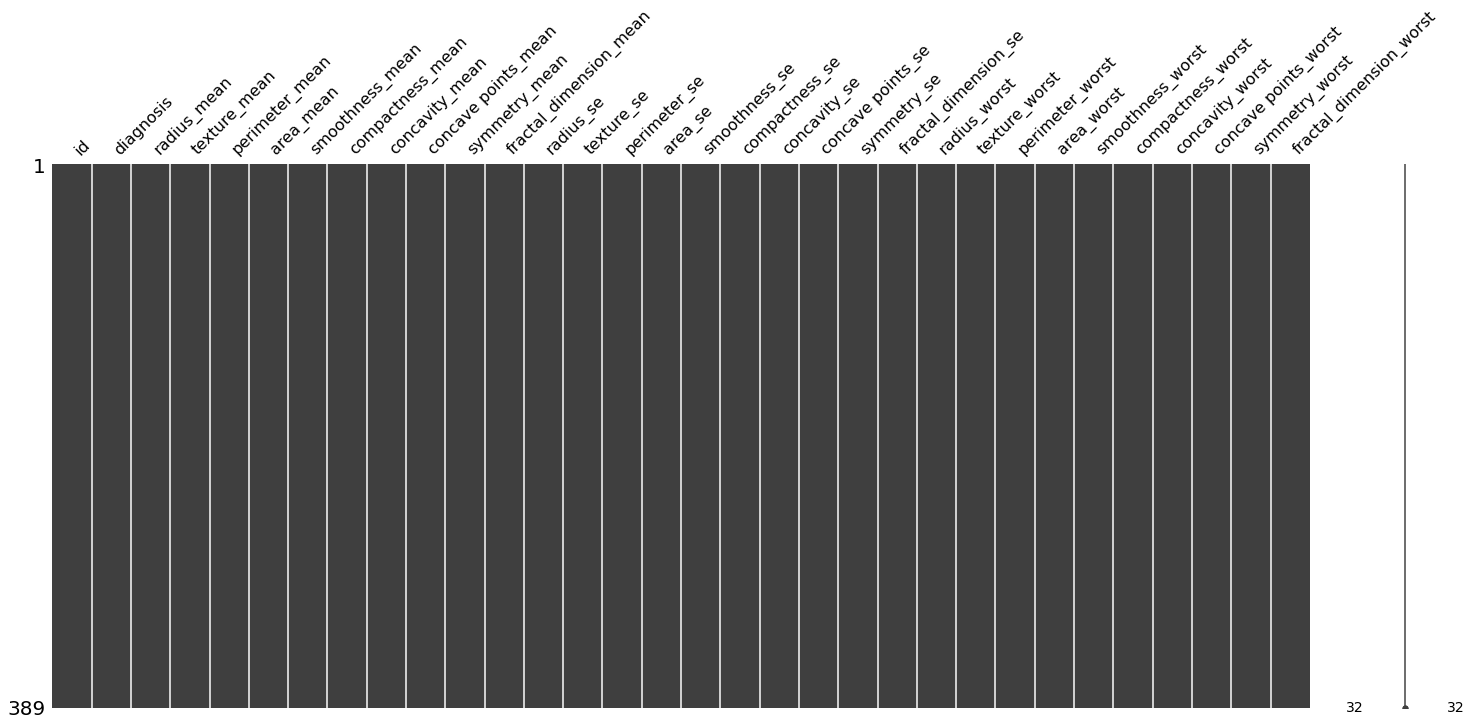

In [ ]:
import missingno as msno
msno.matrix(df)
plt.show()

In [ ]:
test_df.isnull().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

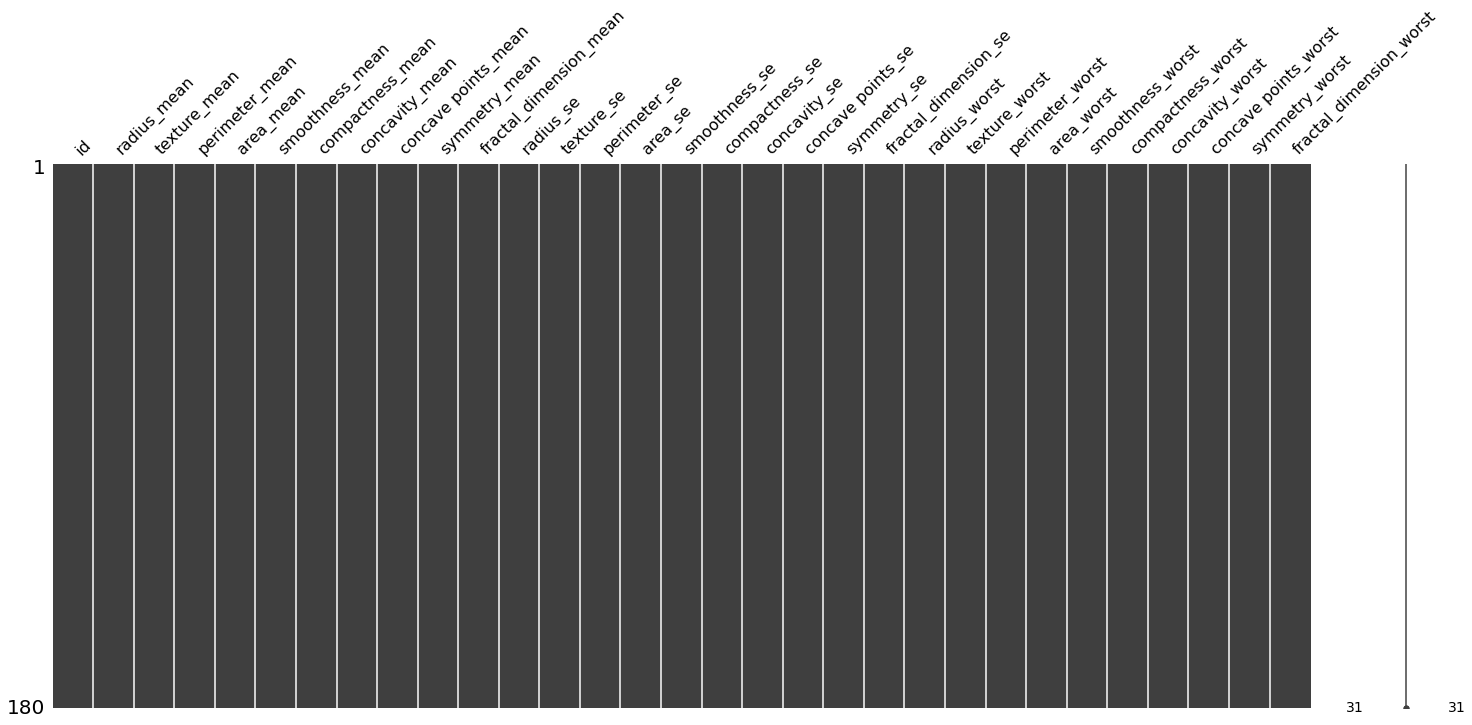

In [ ]:
msno.matrix(test_df)
plt.show()

In [ ]:
df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T

0.000     0.050      0.500        0.950         0.990         1.000
id                      8670.000 89344.800 891703.000 88444762.000 872206902.000 901034302.000
radius_mean                6.981     9.652     13.500       20.576        24.366        28.110
texture_mean               9.710    13.048     18.660       26.070        31.282        39.280
perimeter_mean            43.790    60.934     87.210      135.460       166.836       188.500
area_mean                143.500   283.540    562.100     1315.800      1775.040      2499.000
smoothness_mean            0.063     0.075      0.097        0.119         0.133         0.145
compactness_mean           0.019     0.038      0.096        0.214         0.283         0.345
concavity_mean             0.000     0.005      0.070        0.245         0.355         0.427
concave points_mean        0.000     0.006      0.038        0.127         0.183         0.201
symmetry_mean              0.117     0.142      0.181        0.238         0.266         0.304
fractal_dimension_mean     0.050     0.053      0.061        0.077         0.085         0.097
radius_se                  0.112     0.167      0.335        0.989         1.224         2.873
texture_se                 0.360     0.540      1.065        2.156         2.793         4.885
perimeter_se               0.757     1.133      2.376        7.231         9.836        21.980
area_se                    7.228    11.408     26.030      119.720       173.564       525.600
smoothness_se              0.002     0.004      0.006        0.012         0.017         0.031
compactness_se             0.002     0.007      0.021        0.066         0.096         0.135
concavity_se               0.000     0.003      0.026        0.086         0.144         0.396
concave points_se          0.000     0.004      0.011        0.023         0.033         0.053
symmetry_se                0.008     0.012      0.019        0.038         0.056         0.079
fractal_dimension_se       0.001     0.002      0.003        0.008         0.014         0.030
radius_worst               7.930    10.554     15.150       25.984        30.781        33.130
texture_worst             12.020    16.370     25.050       35.312        42.212        49.540
perimeter_worst           50.410    67.484     99.210      177.000       207.388       229.300
area_worst               185.200   338.700    706.200     2065.000      2967.880      3432.000
smoothness_worst           0.071     0.096      0.132        0.173         0.189         0.223
compactness_worst          0.027     0.071      0.221        0.590         0.784         1.058
concavity_worst            0.000     0.019      0.243        0.693         0.849         1.252
concave points_worst       0.000     0.025      0.109        0.242         0.274         0.291
symmetry_worst             0.157     0.210      0.285        0.424         0.520         0.664
fractal_dimension_worst    0.055     0.062      0.080        0.120         0.143         0.207

In [ ]:
# df.drop("id", axis=1, inplace=True)

In [ ]:
num_cols = [col for col in df.columns if df[col].dtype != "O" and col not in "id"]
num_cols

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
cat_cols

['diagnosis']

In [ ]:
def summary_cat_cols(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe, palette="hls")
        plt.show(block=True)

   diagnosis  Ratio
B        219 56.298
M        170 43.702
##########################################


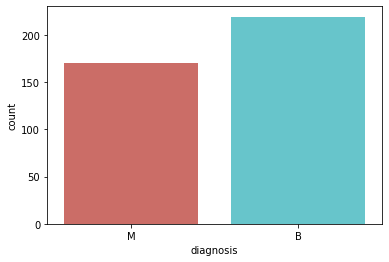

In [ ]:
for col in cat_cols:
    summary_cat_cols(df, col, plot=True)

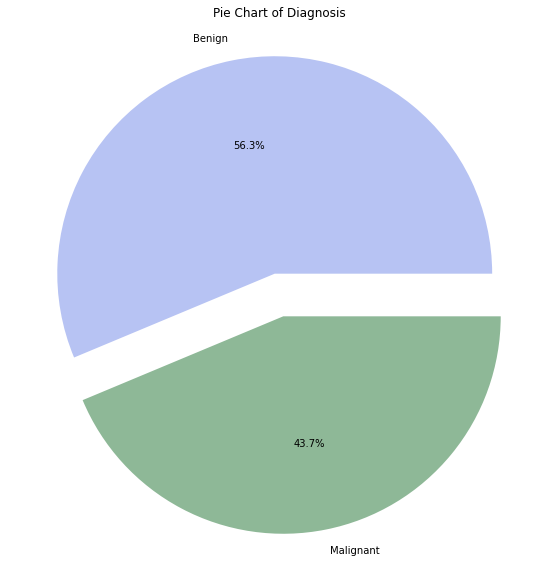

In [ ]:
Vals = list(pd.value_counts(df["diagnosis"]))
A = df["diagnosis"].value_counts().index.tolist()
explode = [0.1] * len(A)
plt.figure(figsize=(10, 10))
plt.title("Pie Chart of Diagnosis")
plt.pie(Vals, explode=explode, labels=["Benign", "Malignant"], autopct='%.1f%%', colors=['#B7C3F3', '#8EB897'])
plt.show()

In [ ]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

In [ ]:
for col in num_cols:
    num_summary(df, col)

count   389.000
mean     14.338
std       3.573
min       6.981
5%        9.652
10%      10.490
20%      11.456
30%      12.184
40%      12.862
50%      13.500
60%      14.418
70%      15.502
80%      17.436
90%      19.558
95%      20.576
99%      24.366
max      28.110
Name: radius_mean, dtype: float64
count   389.000
mean     18.980
std       4.147
min       9.710
5%       13.048
10%      14.060
20%      15.426
30%      16.528
40%      17.634
50%      18.660
60%      19.718
70%      20.986
80%      22.134
90%      24.024
95%      26.070
99%      31.282
max      39.280
Name: texture_mean, dtype: float64
count   389.000
mean     93.438
std      24.613
min      43.790
5%       60.934
10%      66.858
20%      73.684
30%      78.174
40%      82.610
50%      87.210
60%      94.230
70%     102.460
80%     114.440
90%     129.920
95%     135.460
99%     166.836
max     188.500
Name: perimeter_mean, dtype: float64
count    389.000
mean     674.740
std      357.460
min      143.500
5%       2

In [ ]:
def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(30, 18)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='Spectral')
    plt.show(block=True)

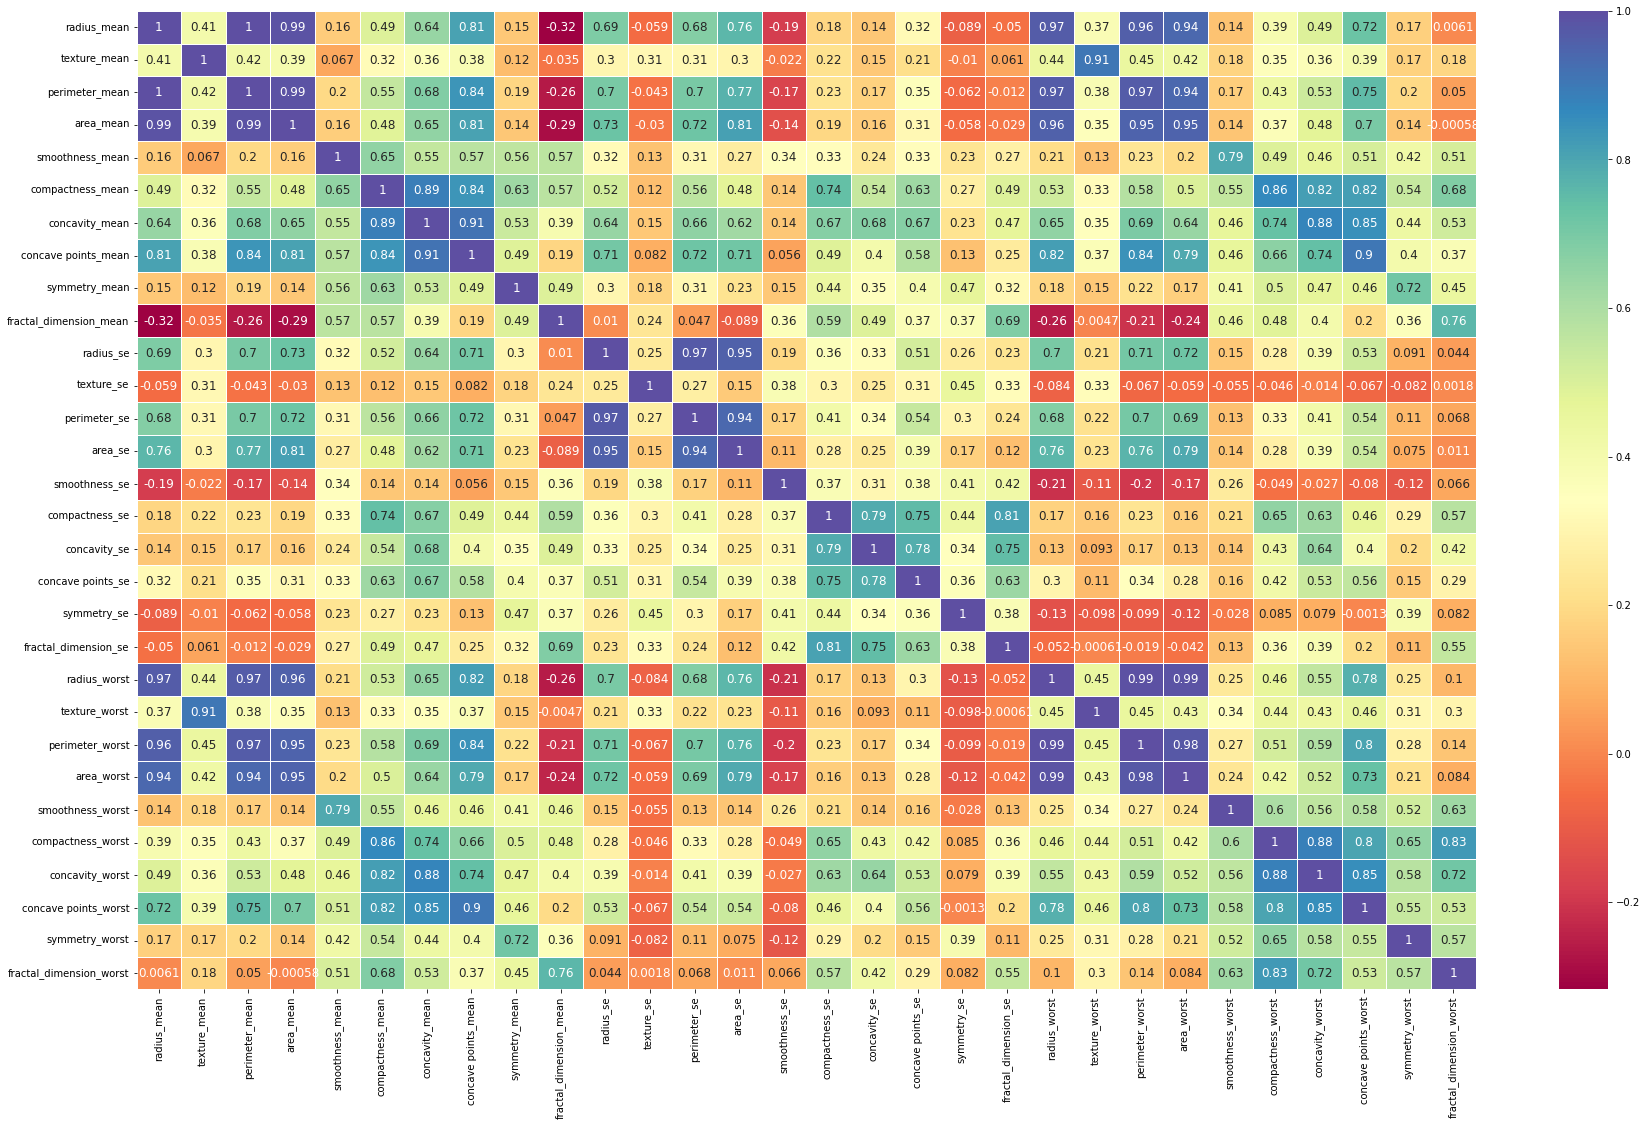

In [ ]:
correlation_matrix(df, num_cols)

In [ ]:
skewness = df.skew().sort_values(ascending= False)
skewness

id                        7.157
concavity_se              5.220
area_se                   4.551
fractal_dimension_se      4.042
perimeter_se              3.182
radius_se                 2.774
smoothness_se             2.618
symmetry_se               2.138
compactness_se            1.906
texture_se                1.744
fractal_dimension_worst   1.715
concave points_se         1.607
area_worst                1.577
area_mean                 1.503
compactness_worst         1.373
symmetry_worst            1.358
concavity_mean            1.295
fractal_dimension_mean    1.201
compactness_mean          1.144
concave points_mean       1.068
concavity_worst           0.993
perimeter_worst           0.962
radius_worst              0.953
perimeter_mean            0.913
radius_mean               0.868
symmetry_mean             0.765
texture_mean              0.731
texture_worst             0.586
concave points_worst      0.382
smoothness_worst          0.360
smoothness_mean           0.345
dtype: f

In [ ]:
skew_cols = ["concavity_se", "area_se","fractal_dimension_se", "perimeter_se", 
             "radius_se", "smoothness_se", "symmetry_se", "compactness_se", 
             "texture_se", "fractal_dimension_worst", "concave points_se", "area_worst",
             "area_mean", "compactness_worst", "concavity_mean", "fractal_dimension_mean",
             "compactness_mean", "concave points_mean"]
df[skew_cols].apply(np.log1p)

concavity_se  area_se  fractal_dimension_se  perimeter_se  radius_se  smoothness_se  symmetry_se  compactness_se  texture_se  fractal_dimension_worst  concave points_se  area_worst  area_mean  compactness_worst  concavity_mean  fractal_dimension_mean  compactness_mean  concave points_mean
0           0.052    5.040                 0.006         2.261      0.740          0.006        0.030           0.048       0.645                    0.112              0.016       7.611      6.910              0.510           0.262                   0.076             0.245                0.137
1           0.018    4.319                 0.004         1.481      0.434          0.005        0.014           0.013       0.550                    0.085              0.013       7.579      7.191              0.171           0.083                   0.055             0.076                0.068
2           0.038    4.554                 0.005         1.720      0.557          0.006        0.022           0.039       0.580                    0.084              0.020       7.444      7.093              0.354           0.180                   0.058             0.148                0.120
3           0.055    3.340                 0.009         1.492      0.403          0.009        0.058           0.072       0.768                    0.160              0.018       6.343      5.959              0.624           0.216                   0.093             0.250                0.100
4           0.055    4.558                 0.005         1.862      0.564          0.011        0.017           0.024       0.577                    0.074              0.019       7.363      7.169              0.186           0.181                   0.057             0.125                0.099
5           0.036    3.339                 0.005         1.168      0.289          0.007        0.021           0.033       0.637                    0.117              0.011       6.610      6.170              0.422           0.147                   0.073             0.157                0.078
6           0.022    4.006                 0.002         1.430      0.369          0.004        0.014           0.014       0.573                    0.080              0.010       7.382      6.948              0.229           0.107                   0.056             0.103                0.071
7           0.025    3.950                 0.005         1.580      0.460          0.009        0.015           0.030       0.866                    0.109              0.014       6.800      6.361              0.313           0.090                   0.072             0.152                0.058
8           0.035    3.232                 0.004         1.226      0.267          0.006        0.021           0.034       0.694                    0.102              0.012       6.607      6.255              0.432           0.171                   0.071             0.177                0.089
9           0.075    3.216                 0.010         1.112      0.261          0.007        0.018           0.070       0.955                    0.189              0.014       6.569      6.167              0.722           0.205                   0.079             0.215                0.082
10          0.011    3.726                 0.003         1.243      0.322          0.004        0.014           0.009       0.783                    0.081              0.008       7.048      6.683              0.144           0.032                   0.055             0.065                0.033
11          0.028    4.010                 0.004         1.518      0.409          0.006        0.020           0.040       0.686                    0.100              0.013       7.170      6.662              0.445           0.095                   0.059             0.122                0.064
12          0.085    4.764                 0.013         2.491      0.671          0.003        0.044           0.080       1.519                    0.097              0.

In [ ]:
test_df[skew_cols].apply(np.log1p)

concavity_se  area_se  fractal_dimension_se  perimeter_se  radius_se  smoothness_se  symmetry_se  compactness_se  texture_se  fractal_dimension_worst  concave points_se  area_worst  area_mean  compactness_worst  concavity_mean  fractal_dimension_mean  compactness_mean  concave points_mean
0           0.072    4.264                 0.006         1.854      0.477          0.011        0.027           0.040       1.344                    0.073              0.034       7.181      7.069              0.216           0.170                   0.057             0.124                0.097
1           0.008    2.556                 0.002         0.854      0.175          0.006        0.019           0.014       0.437                    0.074              0.007       5.980      5.776              0.153           0.019                   0.064             0.073                0.019
2           0.000    3.396                 0.007         1.427      0.417          0.016        0.018           0.019       1.125                    0.085              0.000       5.762      5.461              0.123           0.000                   0.069             0.072                0.000
3           0.049    4.218                 0.004         1.736      0.499          0.007        0.018           0.029       0.846                    0.097              0.016       7.215      6.614              0.330           0.173                   0.065             0.145                0.087
4           0.046    4.407                 0.004         1.641      0.485          0.005        0.020           0.037       0.653                    0.096              0.013       7.641      7.250              0.452           0.248                   0.064             0.190                0.145
5           0.018    3.145                 0.002         1.054      0.250          0.008        0.020           0.016       0.975                    0.068              0.007       6.329      6.103              0.163           0.047                   0.060             0.093                0.033
6           0.011    2.615                 0.001         0.805      0.140          0.005        0.017           0.013       0.988                    0.064              0.009       6.530      6.414              0.116           0.026                   0.056             0.052                0.032
7           0.033    3.010                 0.002         0.921      0.194          0.005        0.013           0.019       0.847                    0.074              0.014       6.516      6.326              0.229           0.082                   0.059             0.109                0.052
8           0.044    3.452                 0.004         1.300      0.310          0.005        0.019           0.034       0.818                    0.068              0.014       6.384      6.233              0.167           0.071                   0.056             0.085                0.040
9           0.019    2.638                 0.004         0.817      0.170          0.004        0.012           0.015       0.524                    0.088              0.004       6.210      5.938              0.172           0.027                   0.060             0.047                0.007
10          0.021    3.260                 0.003         1.171      0.296          0.005        0.015           0.019       0.761                    0.078              0.005       6.333      6.071              0.159           0.028                   0.058             0.060                0.016
11          0.060    3.750                 0.005         1.417      0.339          0.007        0.016           0.037       0.574                    0.113              0.010       7.174      6.903              0.465           0.277                   0.069             0.229                0.113
12          0.014    2.993                 0.002         0.974      0.225          0.006        0.011           0.012       0.715                    0.070              0.

In [ ]:
df.corr()

id  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
id                       1.000       -0.013         0.122          -0.014     -0.006           -0.005            -0.019           0.002               -0.025          0.007                  -0.009      0.035       0.049         0.036    0.020          0.179           0.053         0.072              0.087        0.030                 0.066        -0.019          0.066           -0.020      -0.015            -0.021             -0.024           -0.012                -0.041          -0.043   
radius_mean             -0.013        1.000         0.408           0.998      0.989            0.157             0.494           0.642                0.808          0.147                  -0.318      0.686      -0.059         0.680    0.761         -0.189           0.183         0.141              0.320       -0.089                -0.050         0.966          0.372            0.962       0.940             0.135              0.391            0.492                 0.723           0.168   
texture_mean             0.122        0.408         1.000           0.415      0.395            0.067             0.323           0.361                0.379          0.115                  -0.035      0.305       0.313         0.312    0.296         -0.022           0.219         0.149              0.210       -0.010                 0.061         0.442          0.907            0.446       0.424             0.177              0.352            0.365                 0.394           0.175   
perimeter_mean          -0.014        0.998         0.415           1.000      0.987            0.196             0.548           0.684                0.839          0.186                  -0.264      0.700      -0.043         0.700    0.771         -0.167           0.230         0.175              0.353       -0.062                -0.012         0.965          0.380            0.967       0.940             0.166              0.435            0.529                 0.751           0.196   
area_mean               -0.006        0.989         0.395           0.987      1.000            0.164             0.485           0.651                0.807          0.144                  -0.290      0.726      -0.030         0.719    0.811         -0.137           0.187         0.156              0.314       -0.058                -0.029         0.956          0.354            0.953       0.952             0.136              0.366            0.478                 0.699           0.143   
smoothness_mean         -0.005        0.157         0.067           0.196      0.164            1.000             0.653           0.548                0.568          0.560                   0.567      0.323       0.134         0.311    0.268          0.339           0.333         0.245              0.332        0.233                 0.274         0.207          0.129            0.235       0.198             0.792              0.495            0.465                 0.509           0.421   
compactness_mean        -0.019        0.494         0.323           0.548      0.485            0.653             1.000           0.889                0.837          0.626                   0.571      0.517       0.122         0.563    0.476          0.142           0.741         0.544              0.626        0.273                 0.494         0.526          0.330            0.580       0.497             0.551              0.864            0.817                 0.817           0.544   
concavity_mean           0.002        0.642         0.361           0.684   

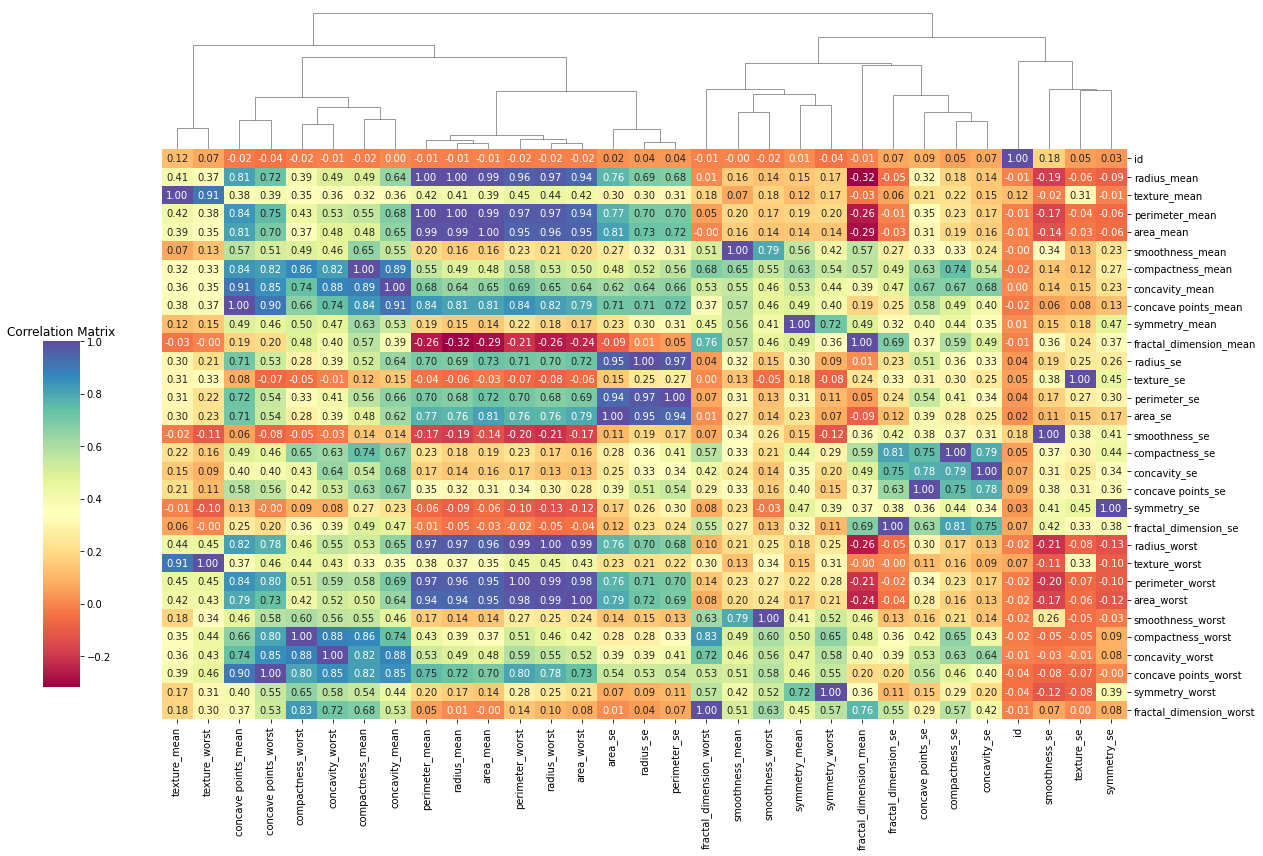

In [ ]:
sns.clustermap(df.corr(), annot = True, fmt = ".2f", figsize=(17, 12),
    row_cluster=False,
    dendrogram_ratio=(.1, .2),
    cbar_pos=(0, .2, .03, .4),
    cmap="Spectral")
plt.title("Correlation Matrix")
plt.show()

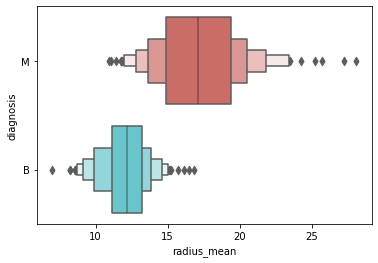

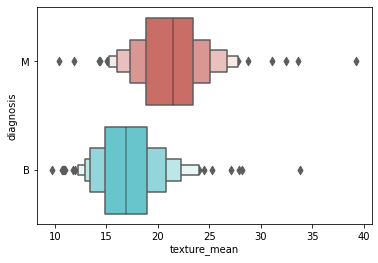

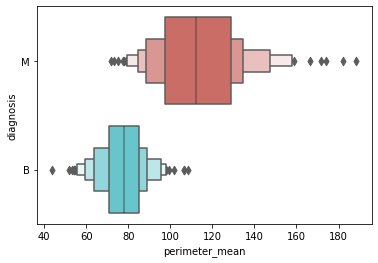

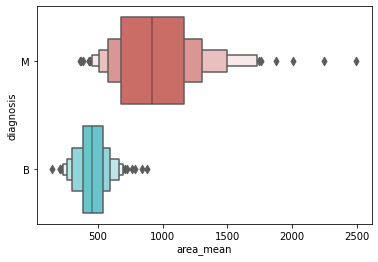

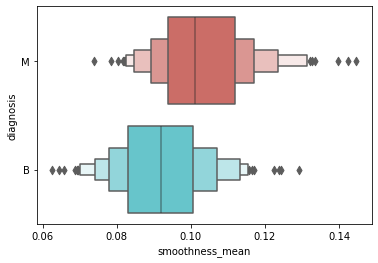

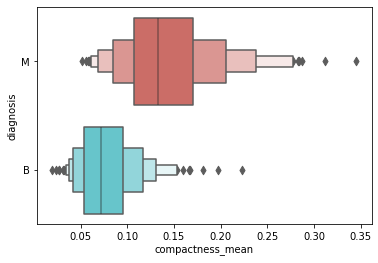

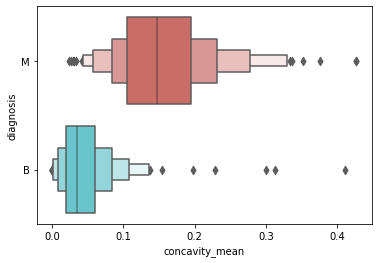

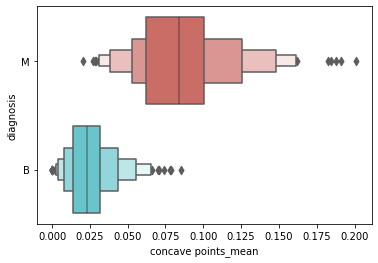

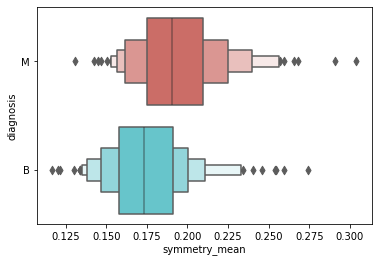

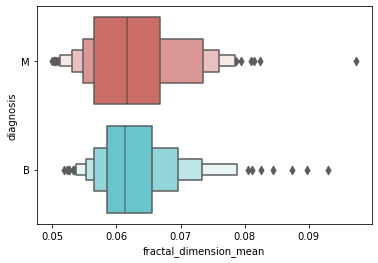

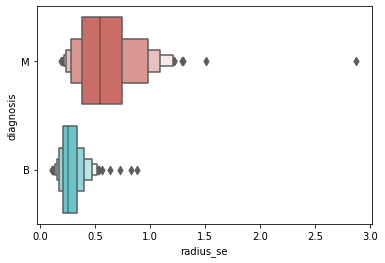

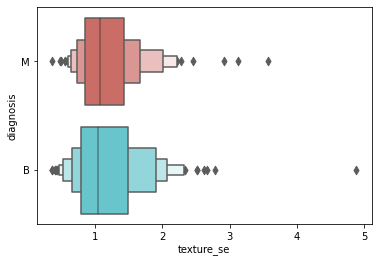

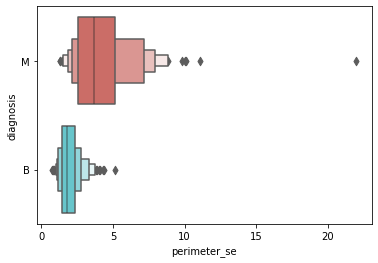

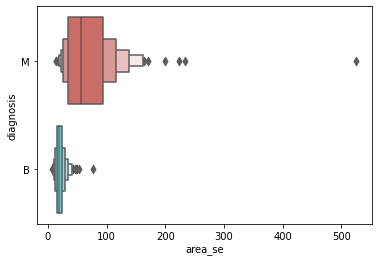

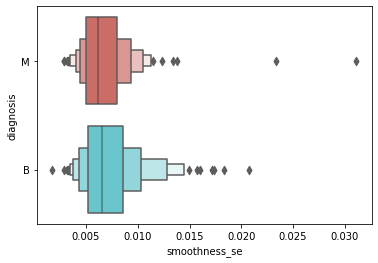

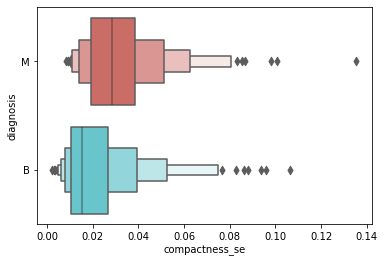

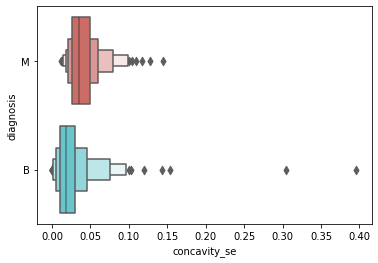

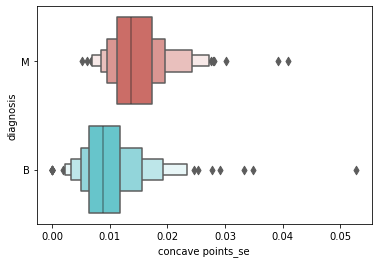

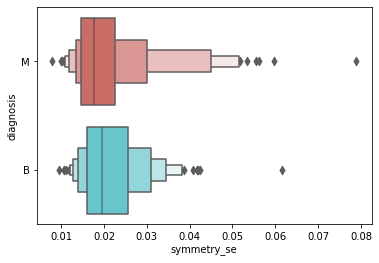

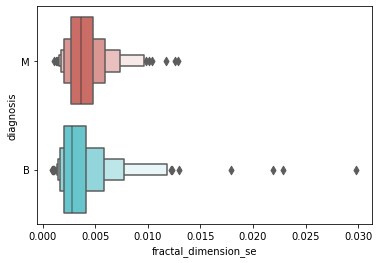

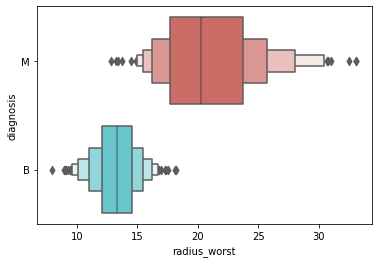

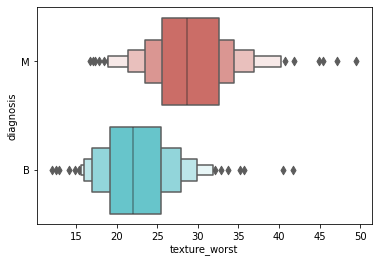

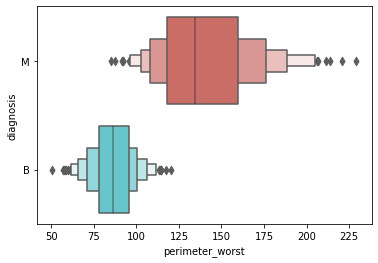

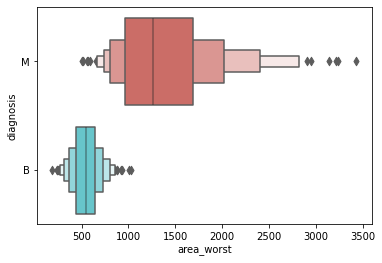

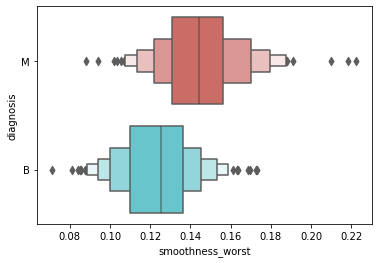

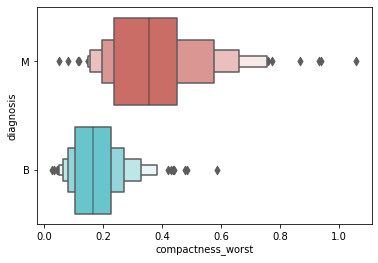

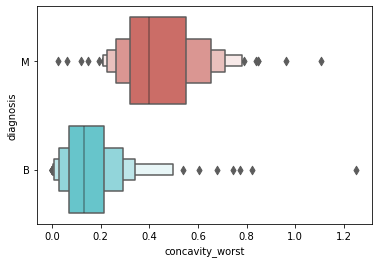

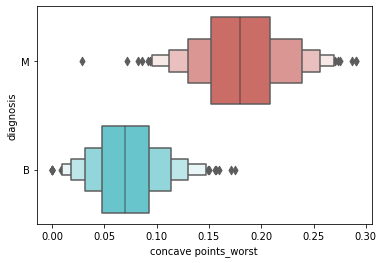

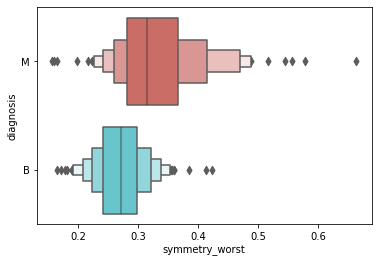

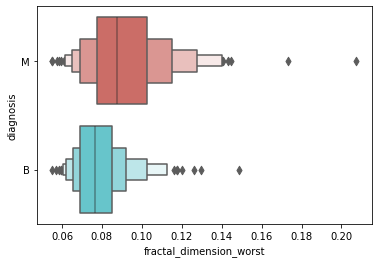

In [ ]:
for i in num_cols:
  sns.boxenplot(data=df, y="diagnosis", x=df[i], palette="hls")
  plt.show()

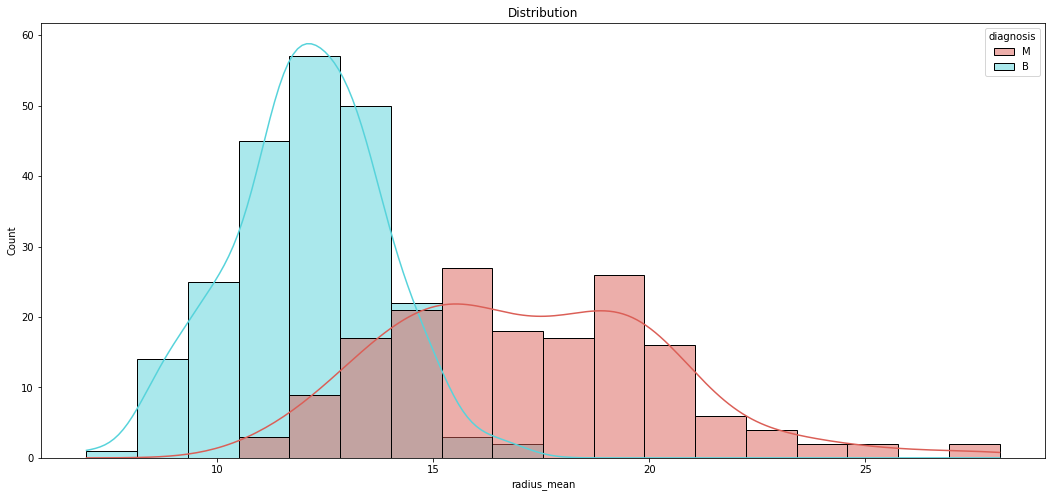

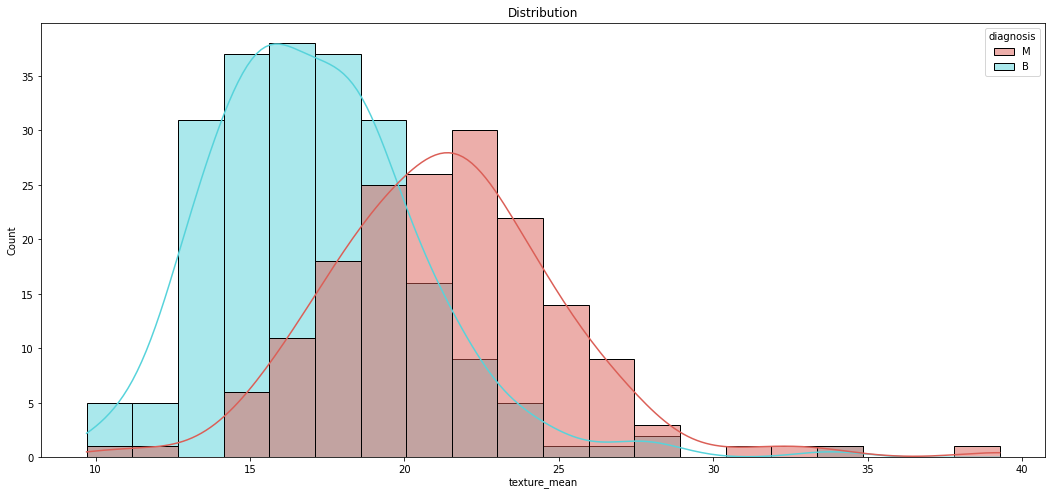

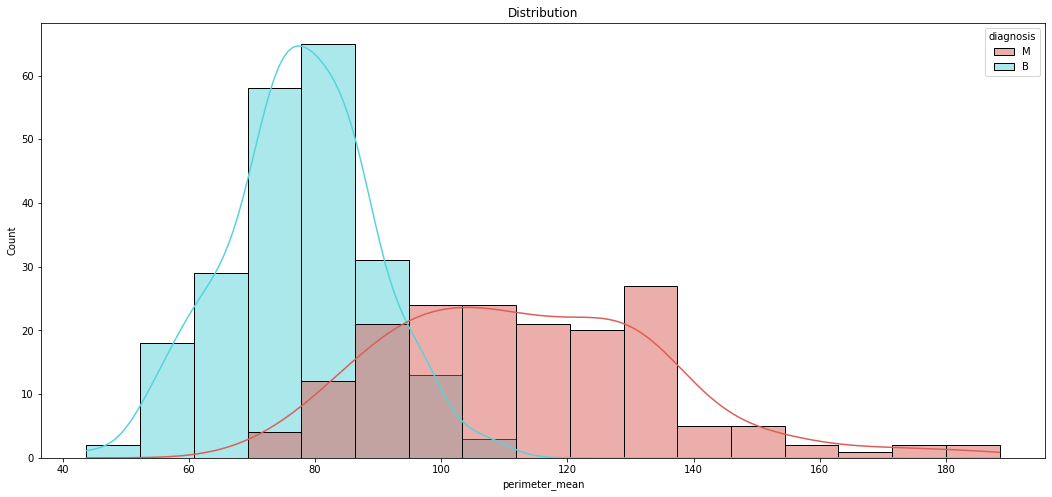

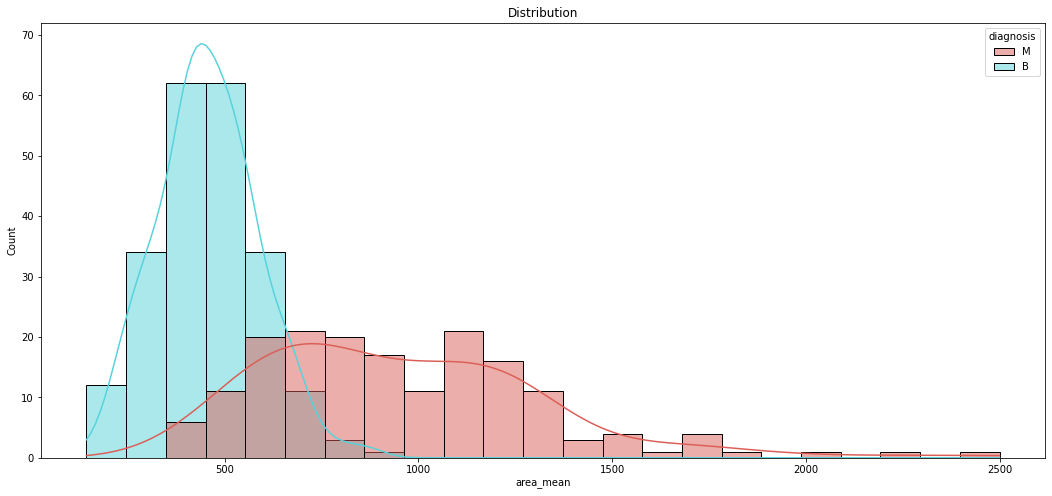

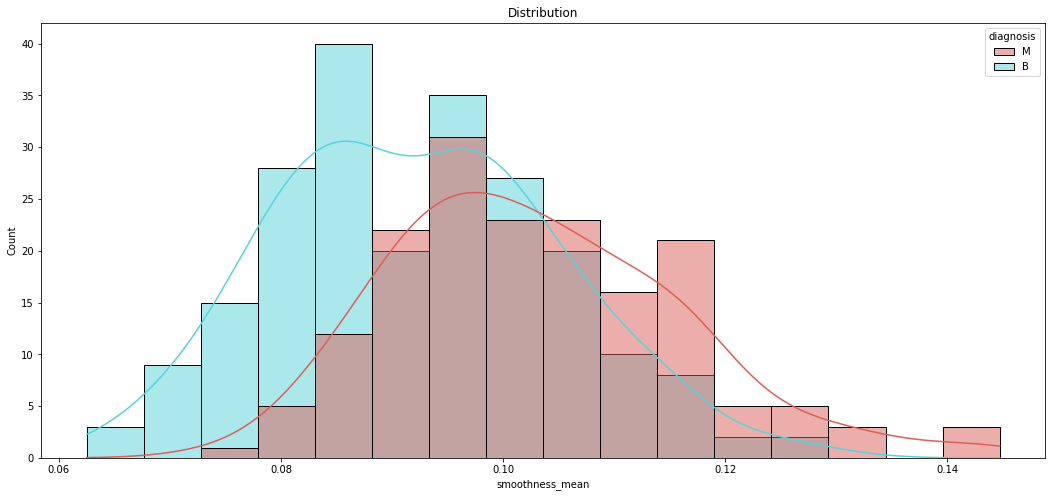

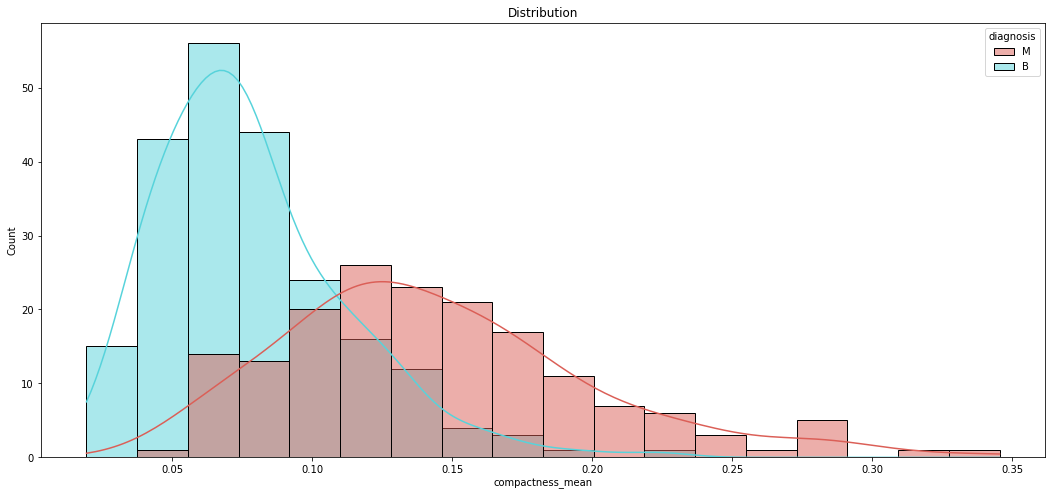

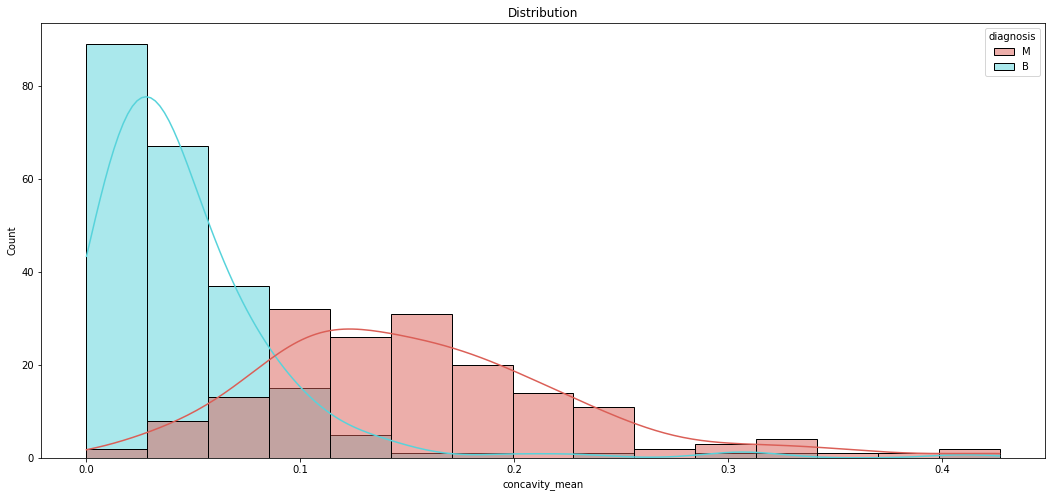

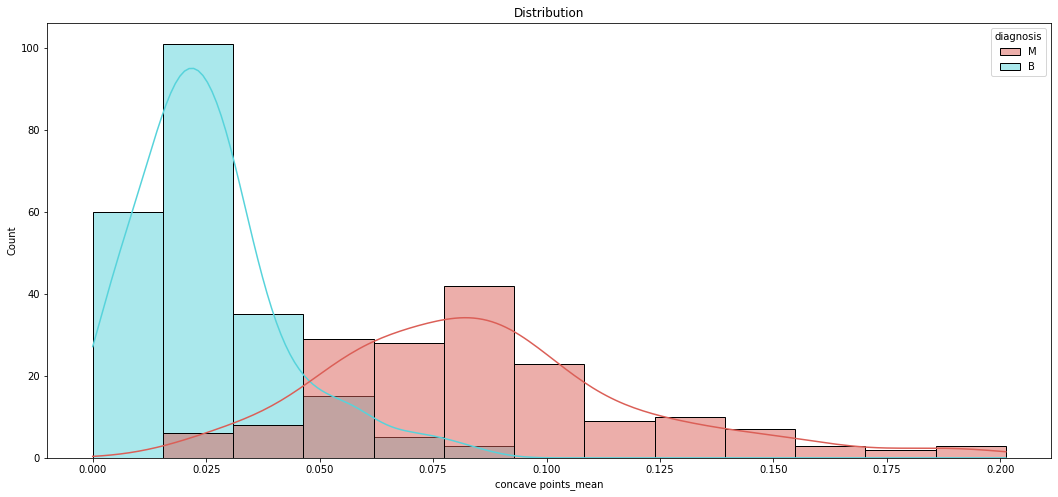

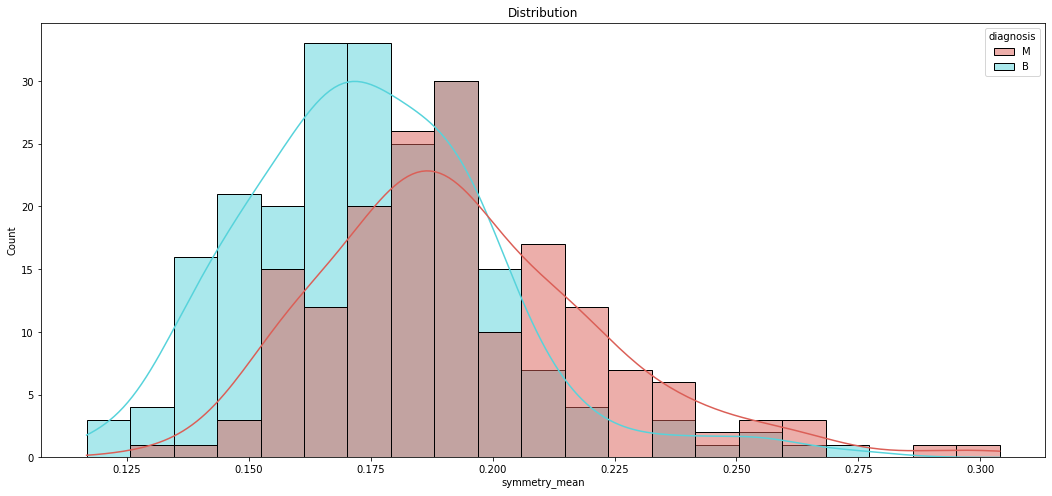

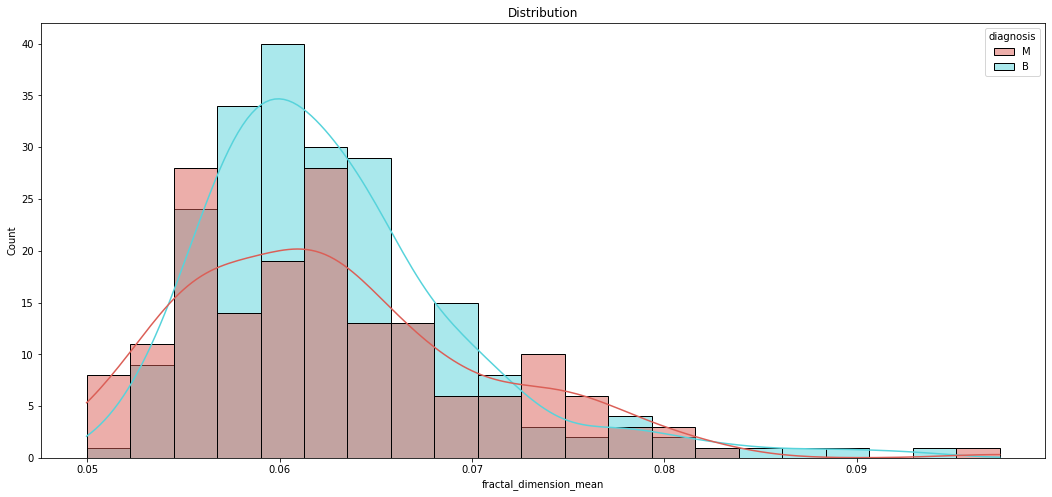

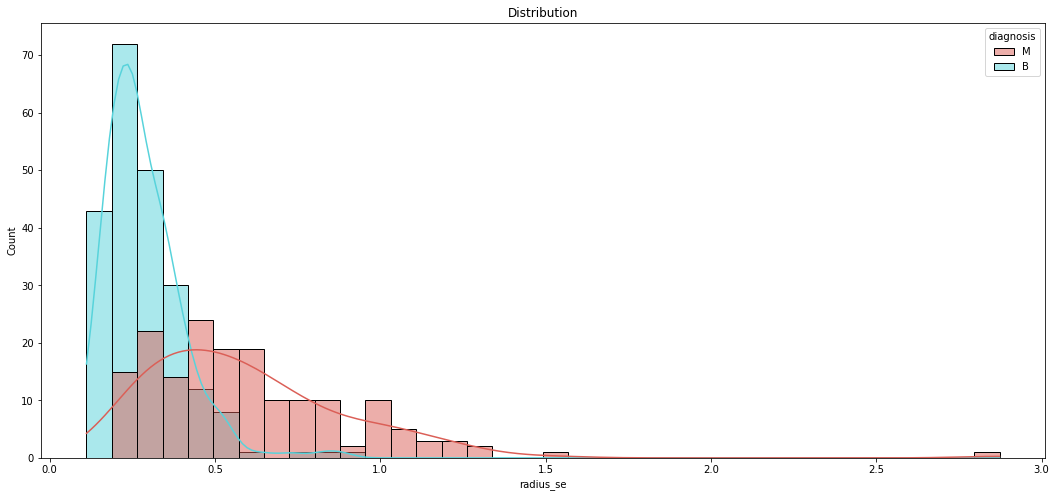

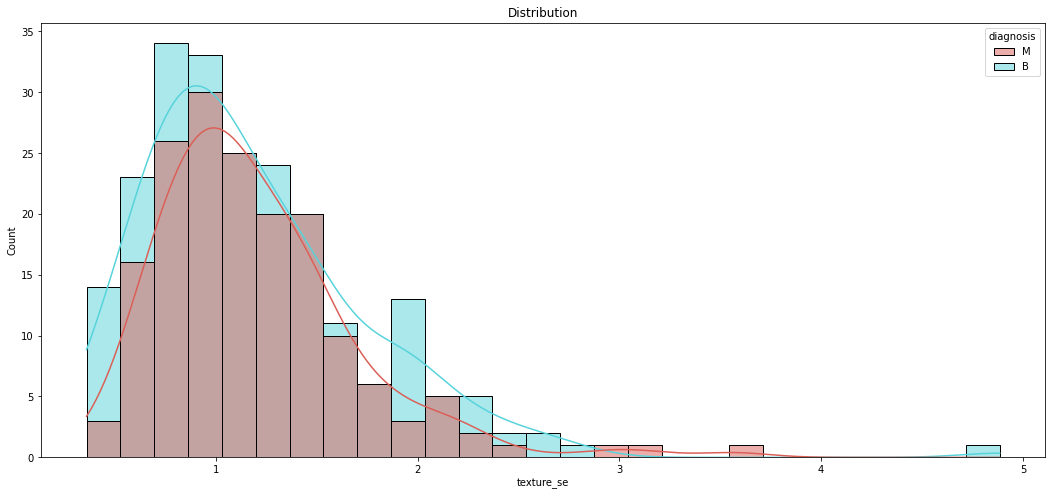

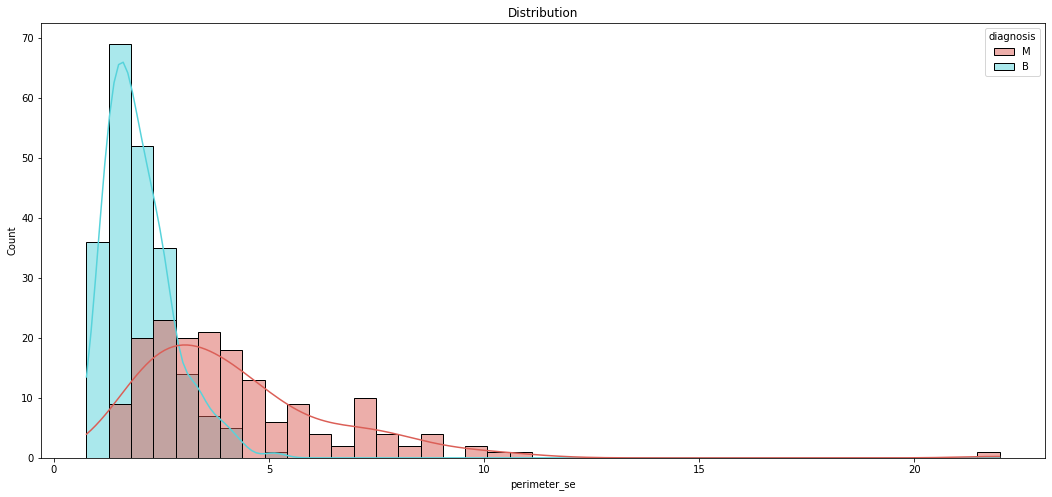

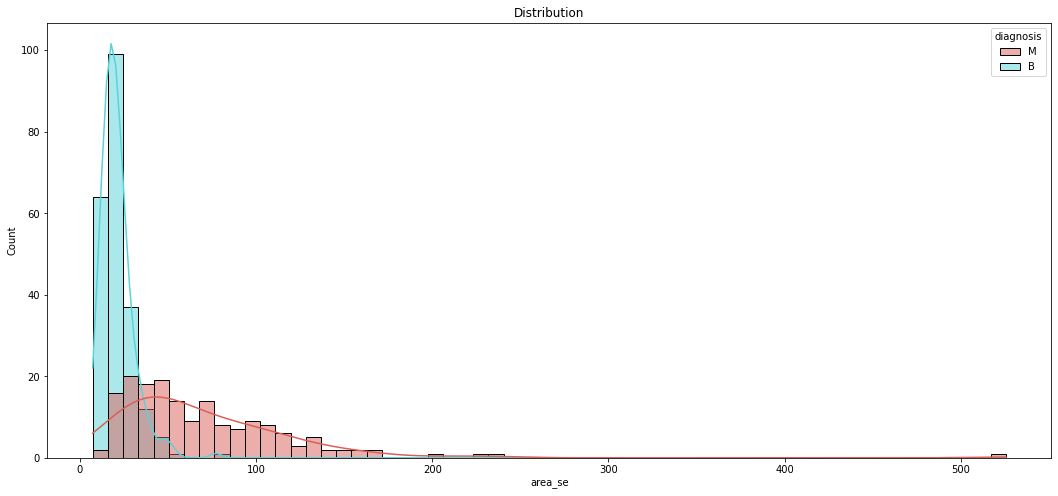

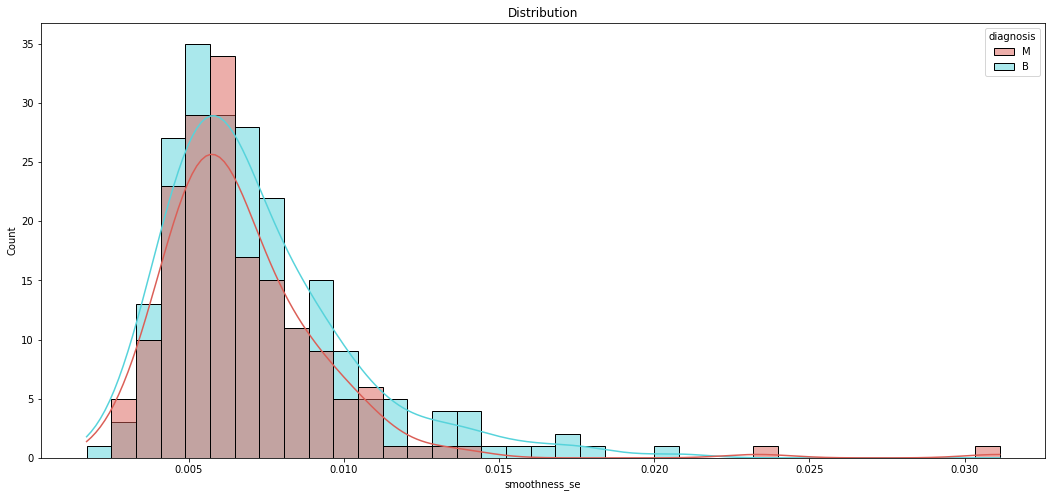

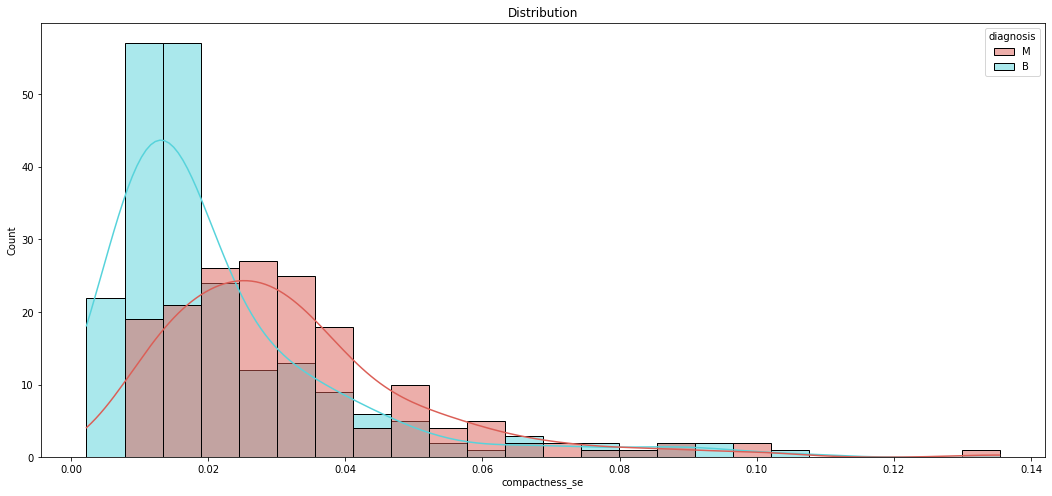

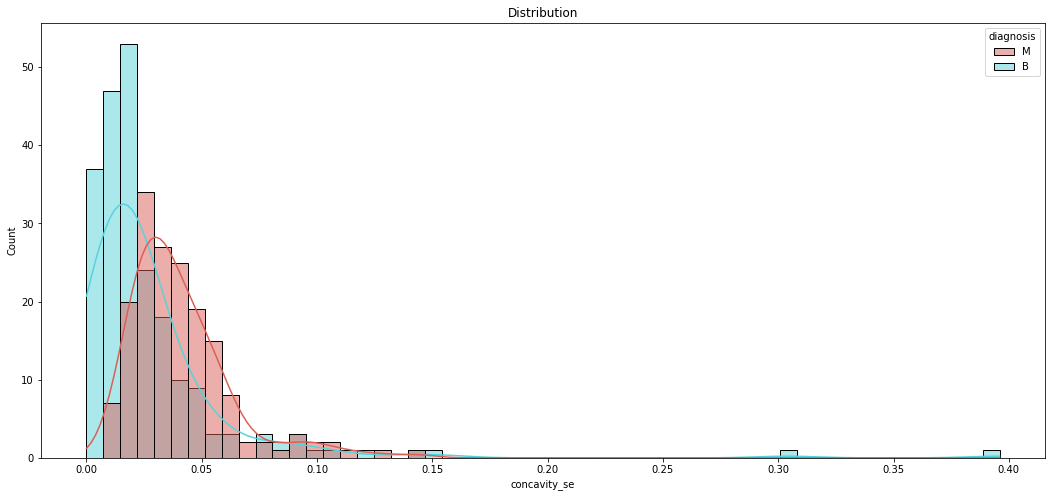

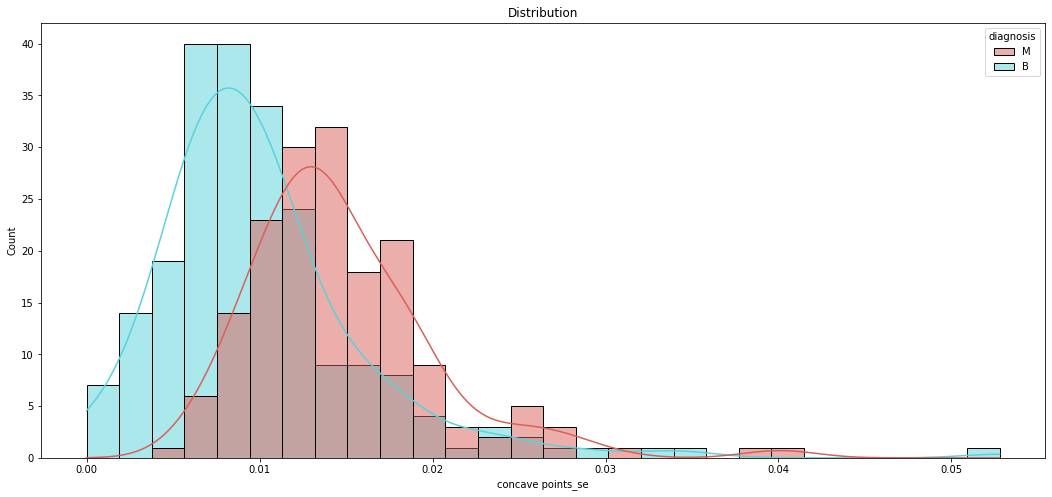

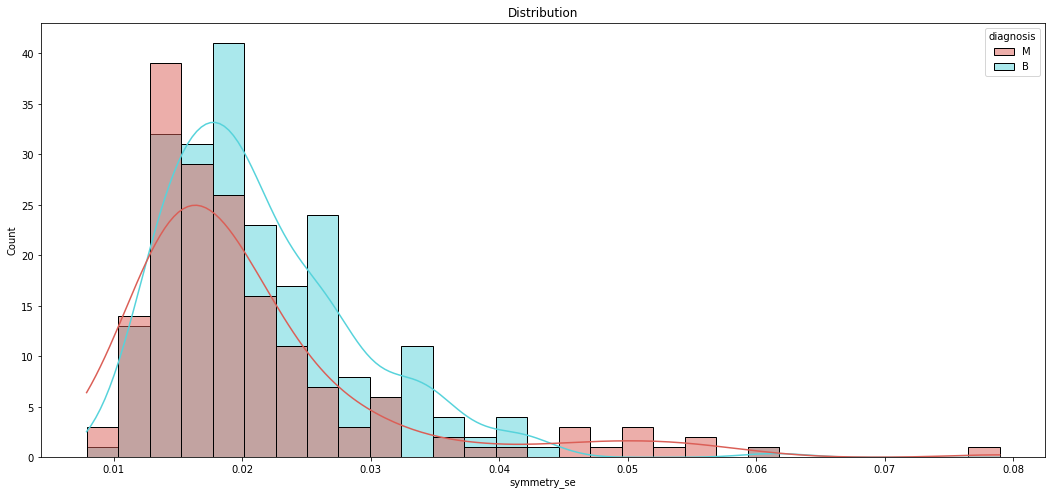

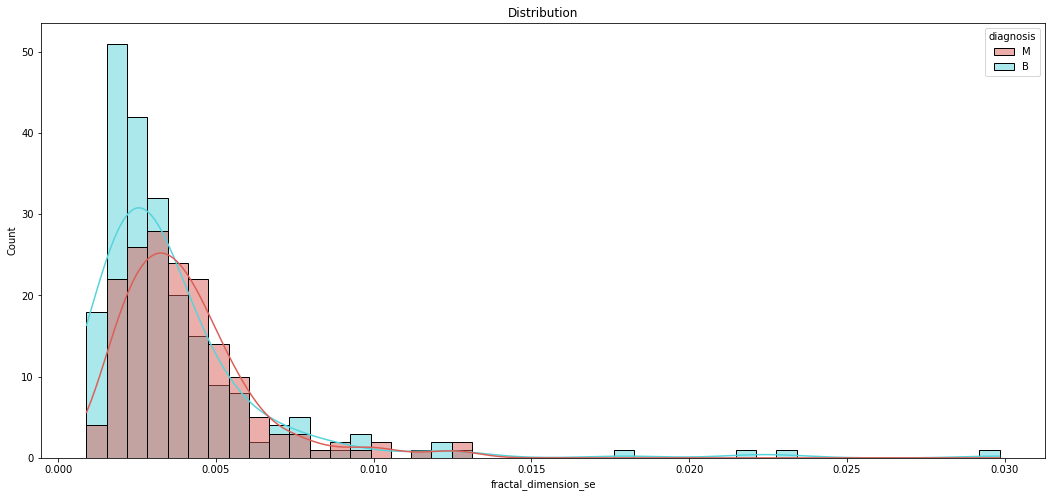

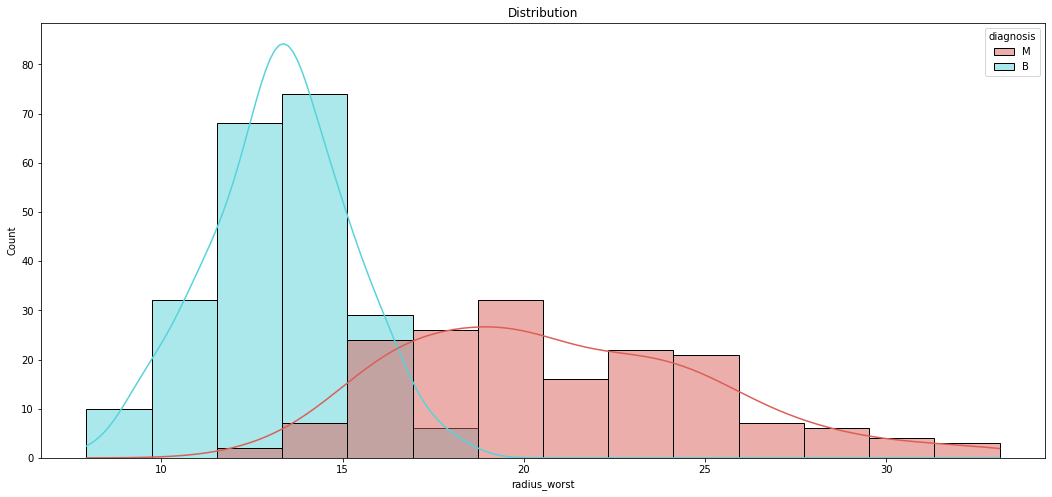

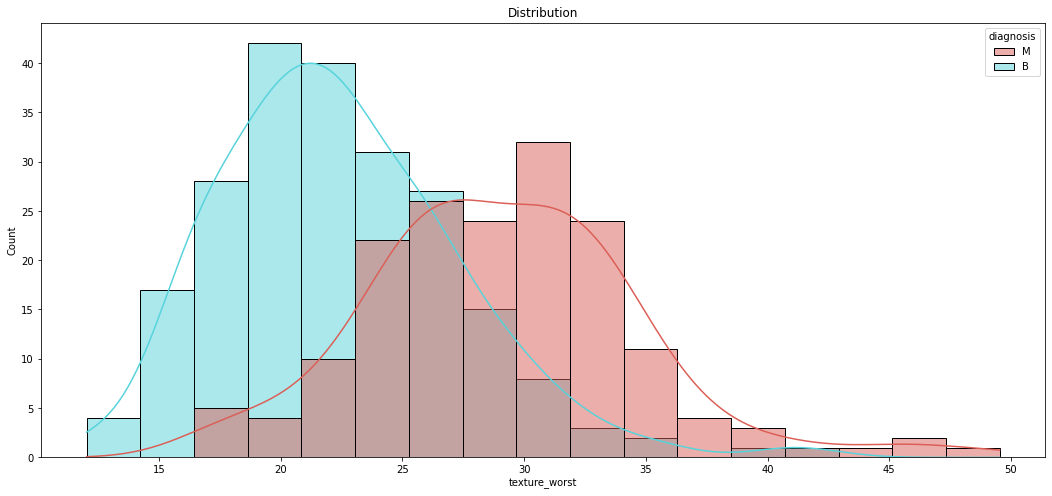

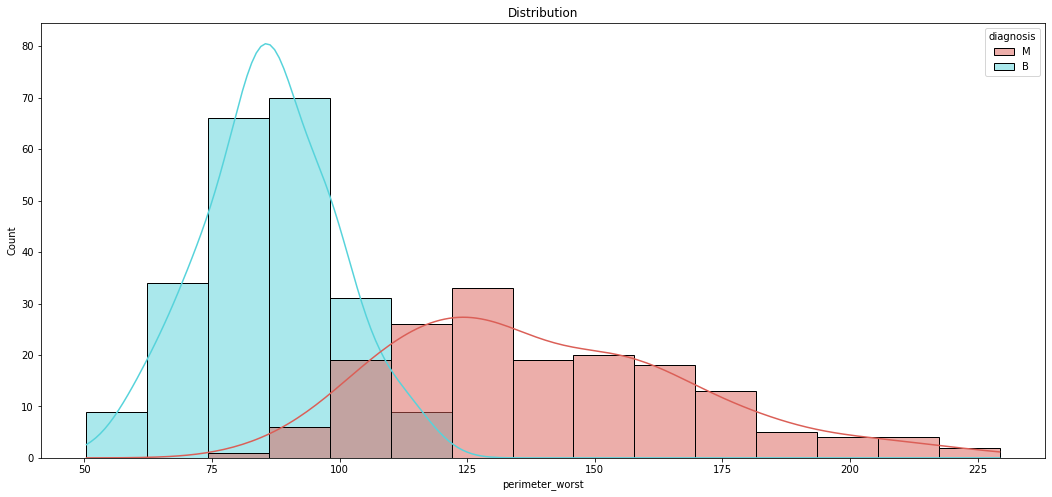

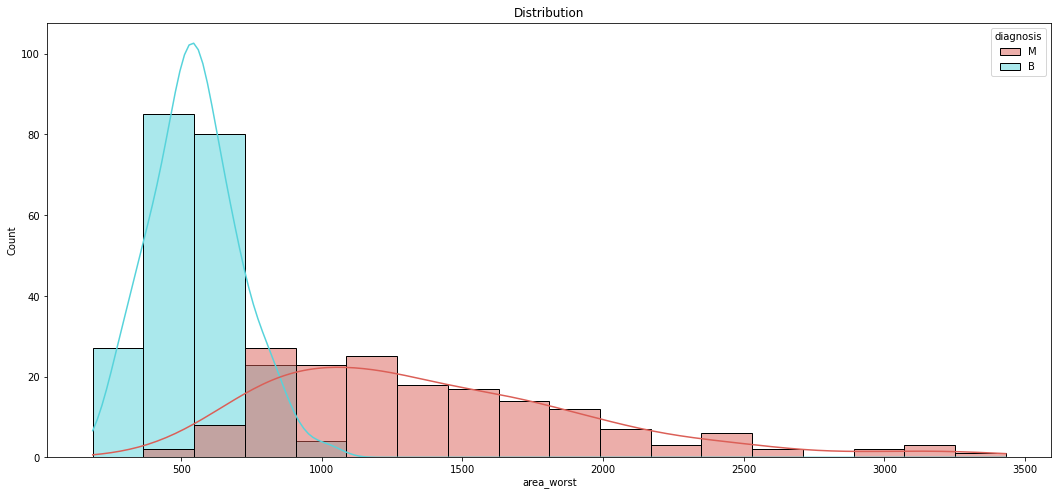

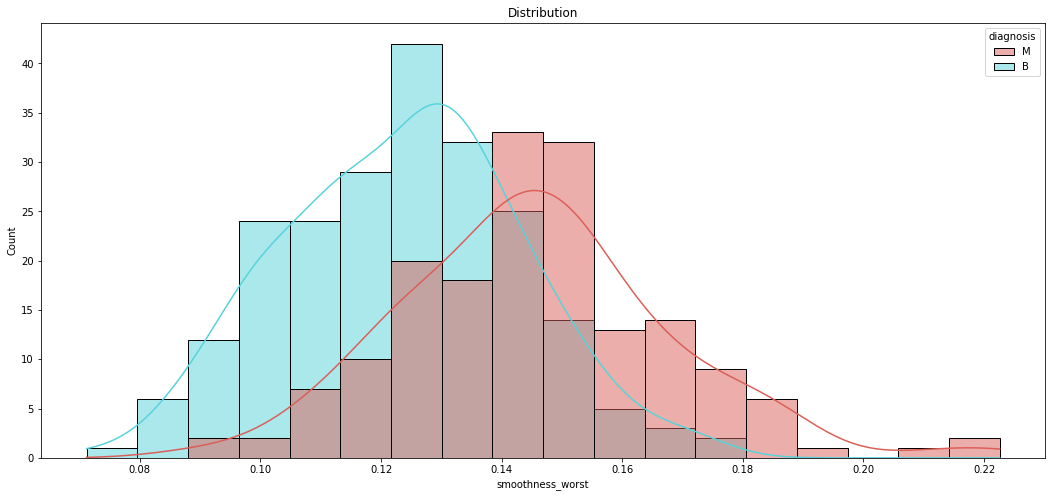

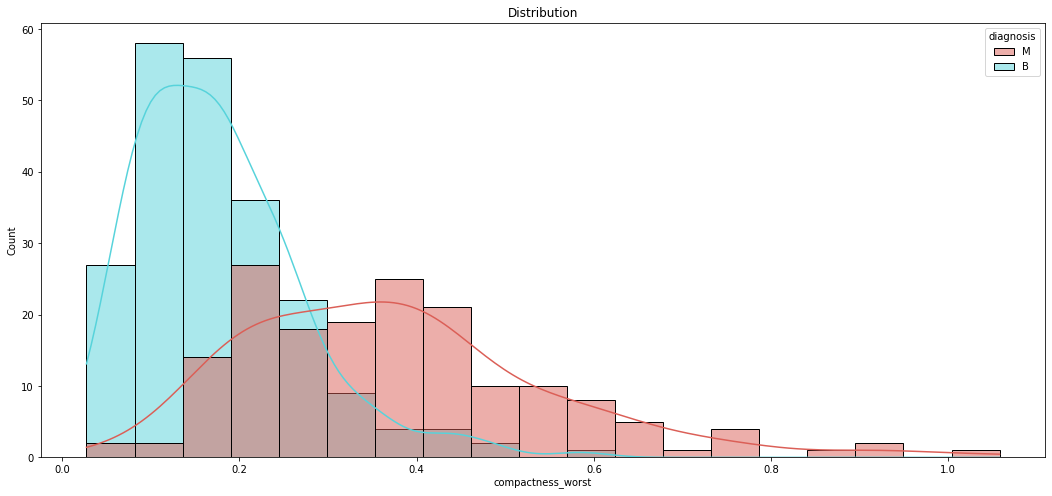

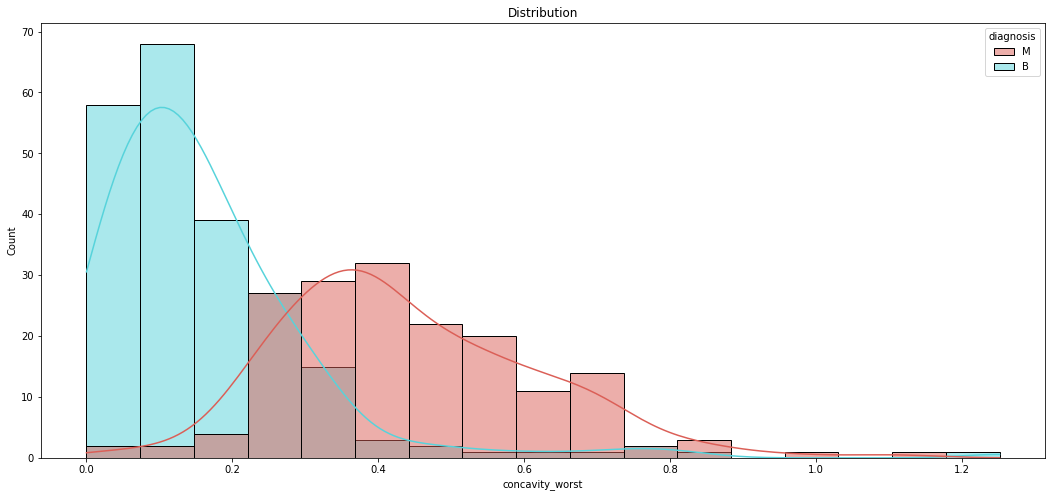

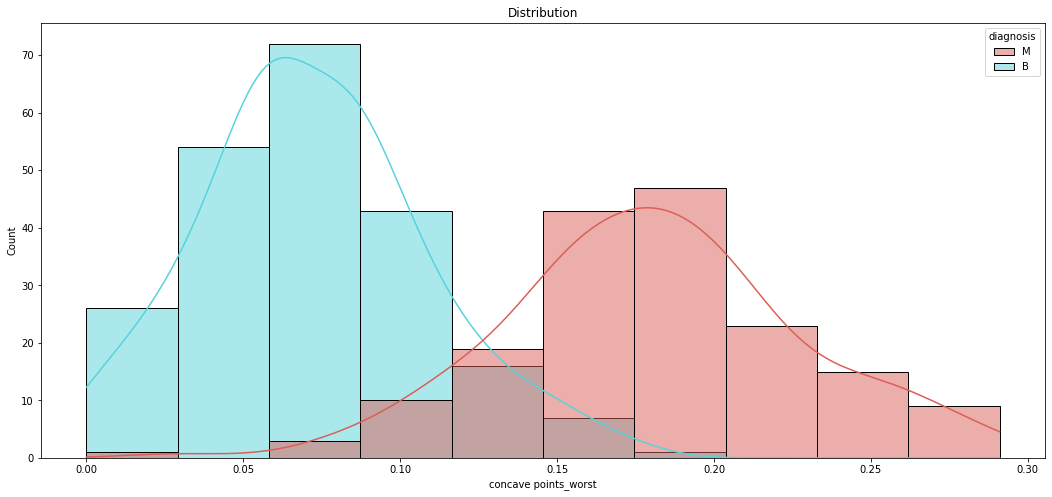

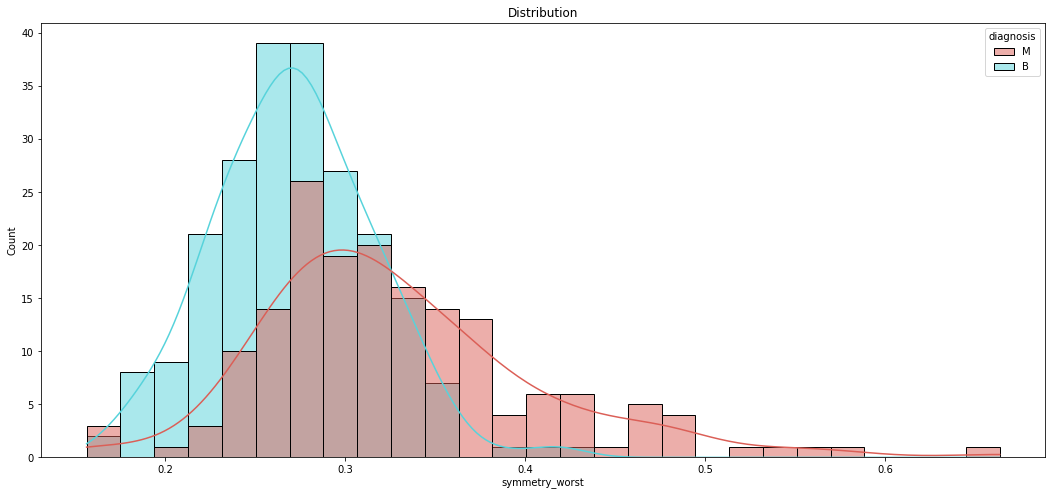

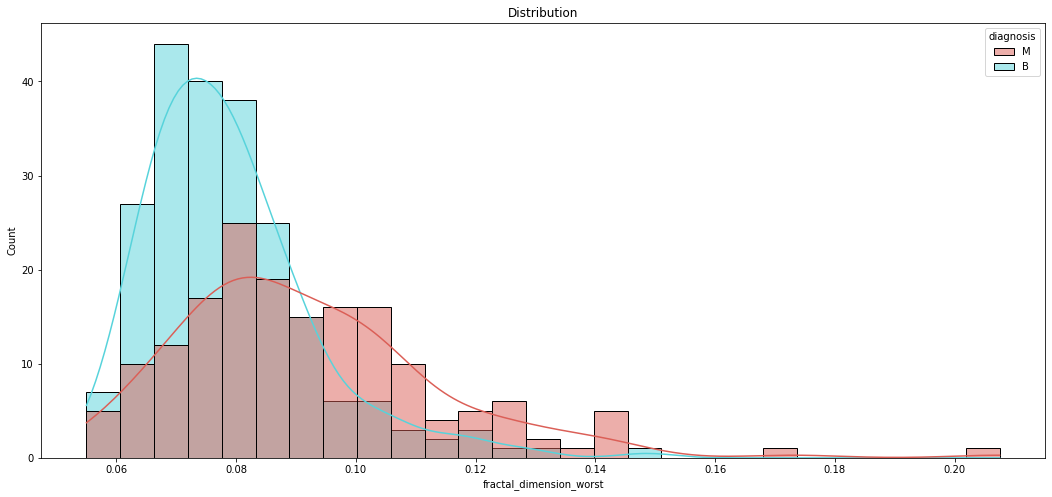

In [ ]:
for i in num_cols:
  plt.figure(figsize=(18, 8))
  sns.histplot(data=df, x=df[i], hue="diagnosis", kde=True, palette="hls")
  plt.title("Distribution")

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
mean_values = df.iloc[:, 1:11]
se_values = df.iloc[:, 11:21]
worst_values = df.iloc[:, 21:]

array([[<AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>],
       [<AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>,
        <AxesSubplot:title={'center':'compactness_mean'}>],
       [<AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>]], dtype=object)

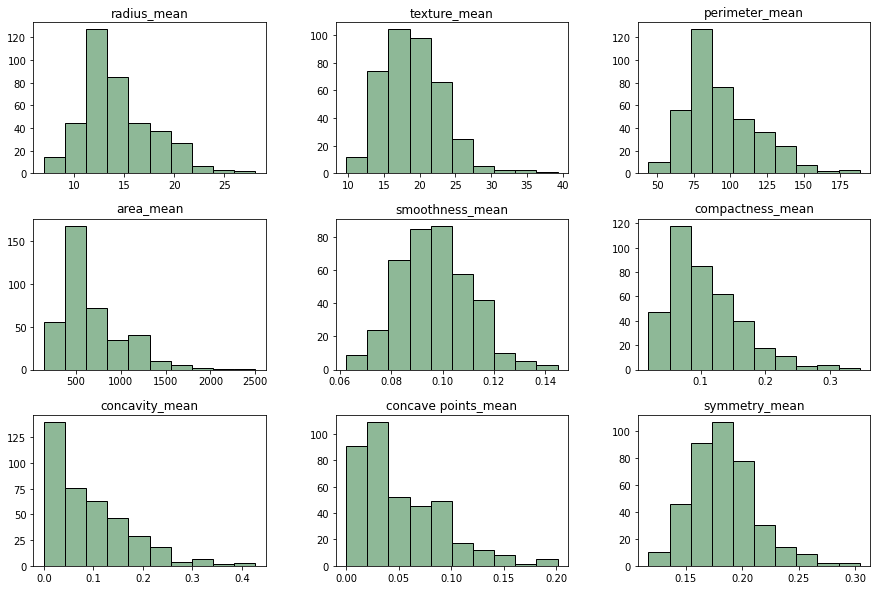

In [ ]:
mean_values.hist(bins=10, grid=False, figsize=(15, 10), color="#8EB897", edgecolor="black")

array([[<AxesSubplot:title={'center':'fractal_dimension_mean'}>,
        <AxesSubplot:title={'center':'radius_se'}>,
        <AxesSubplot:title={'center':'texture_se'}>],
       [<AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>],
       [<AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>,
        <AxesSubplot:title={'center':'concave points_se'}>],
       [<AxesSubplot:title={'center':'symmetry_se'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

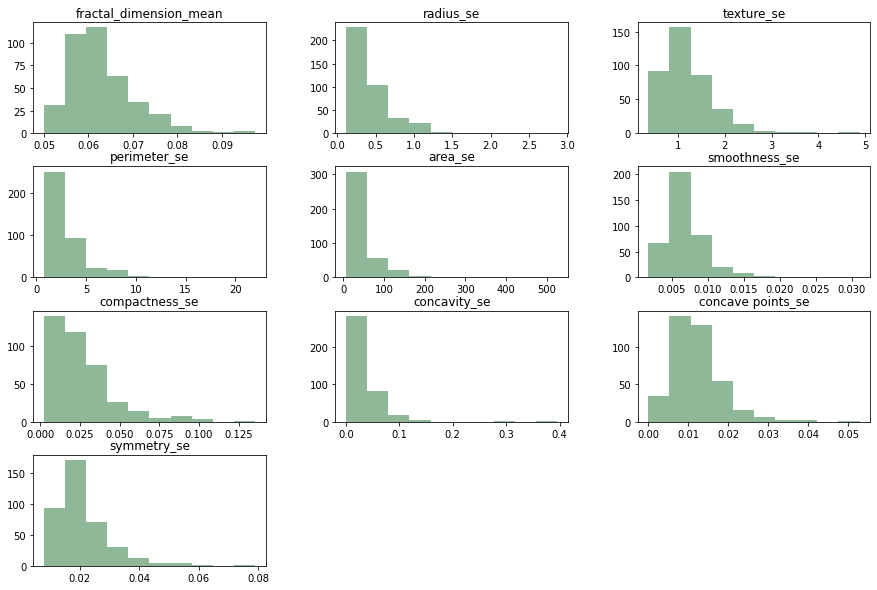

In [ ]:
se_values.hist(bins=10, grid=False, figsize=(15, 10), color="#8EB897")

array([[<AxesSubplot:title={'center':'fractal_dimension_se'}>,
        <AxesSubplot:title={'center':'radius_worst'}>,
        <AxesSubplot:title={'center':'texture_worst'}>],
       [<AxesSubplot:title={'center':'perimeter_worst'}>,
        <AxesSubplot:title={'center':'area_worst'}>,
        <AxesSubplot:title={'center':'smoothness_worst'}>],
       [<AxesSubplot:title={'center':'compactness_worst'}>,
        <AxesSubplot:title={'center':'concavity_worst'}>,
        <AxesSubplot:title={'center':'concave points_worst'}>],
       [<AxesSubplot:title={'center':'symmetry_worst'}>,
        <AxesSubplot:title={'center':'fractal_dimension_worst'}>,
        <AxesSubplot:>]], dtype=object)

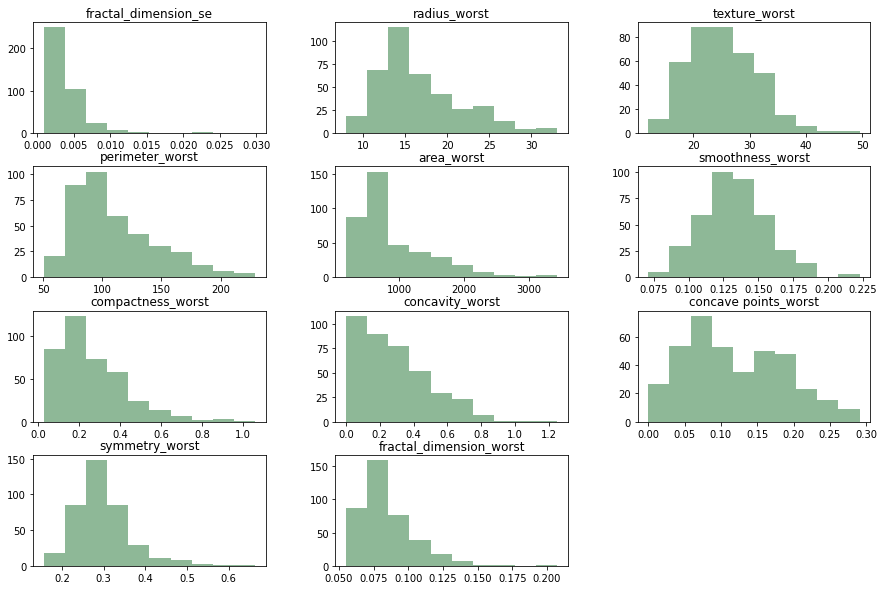

In [ ]:
worst_values.hist(bins=10, grid=False, figsize=(15, 10), color="#8EB897")

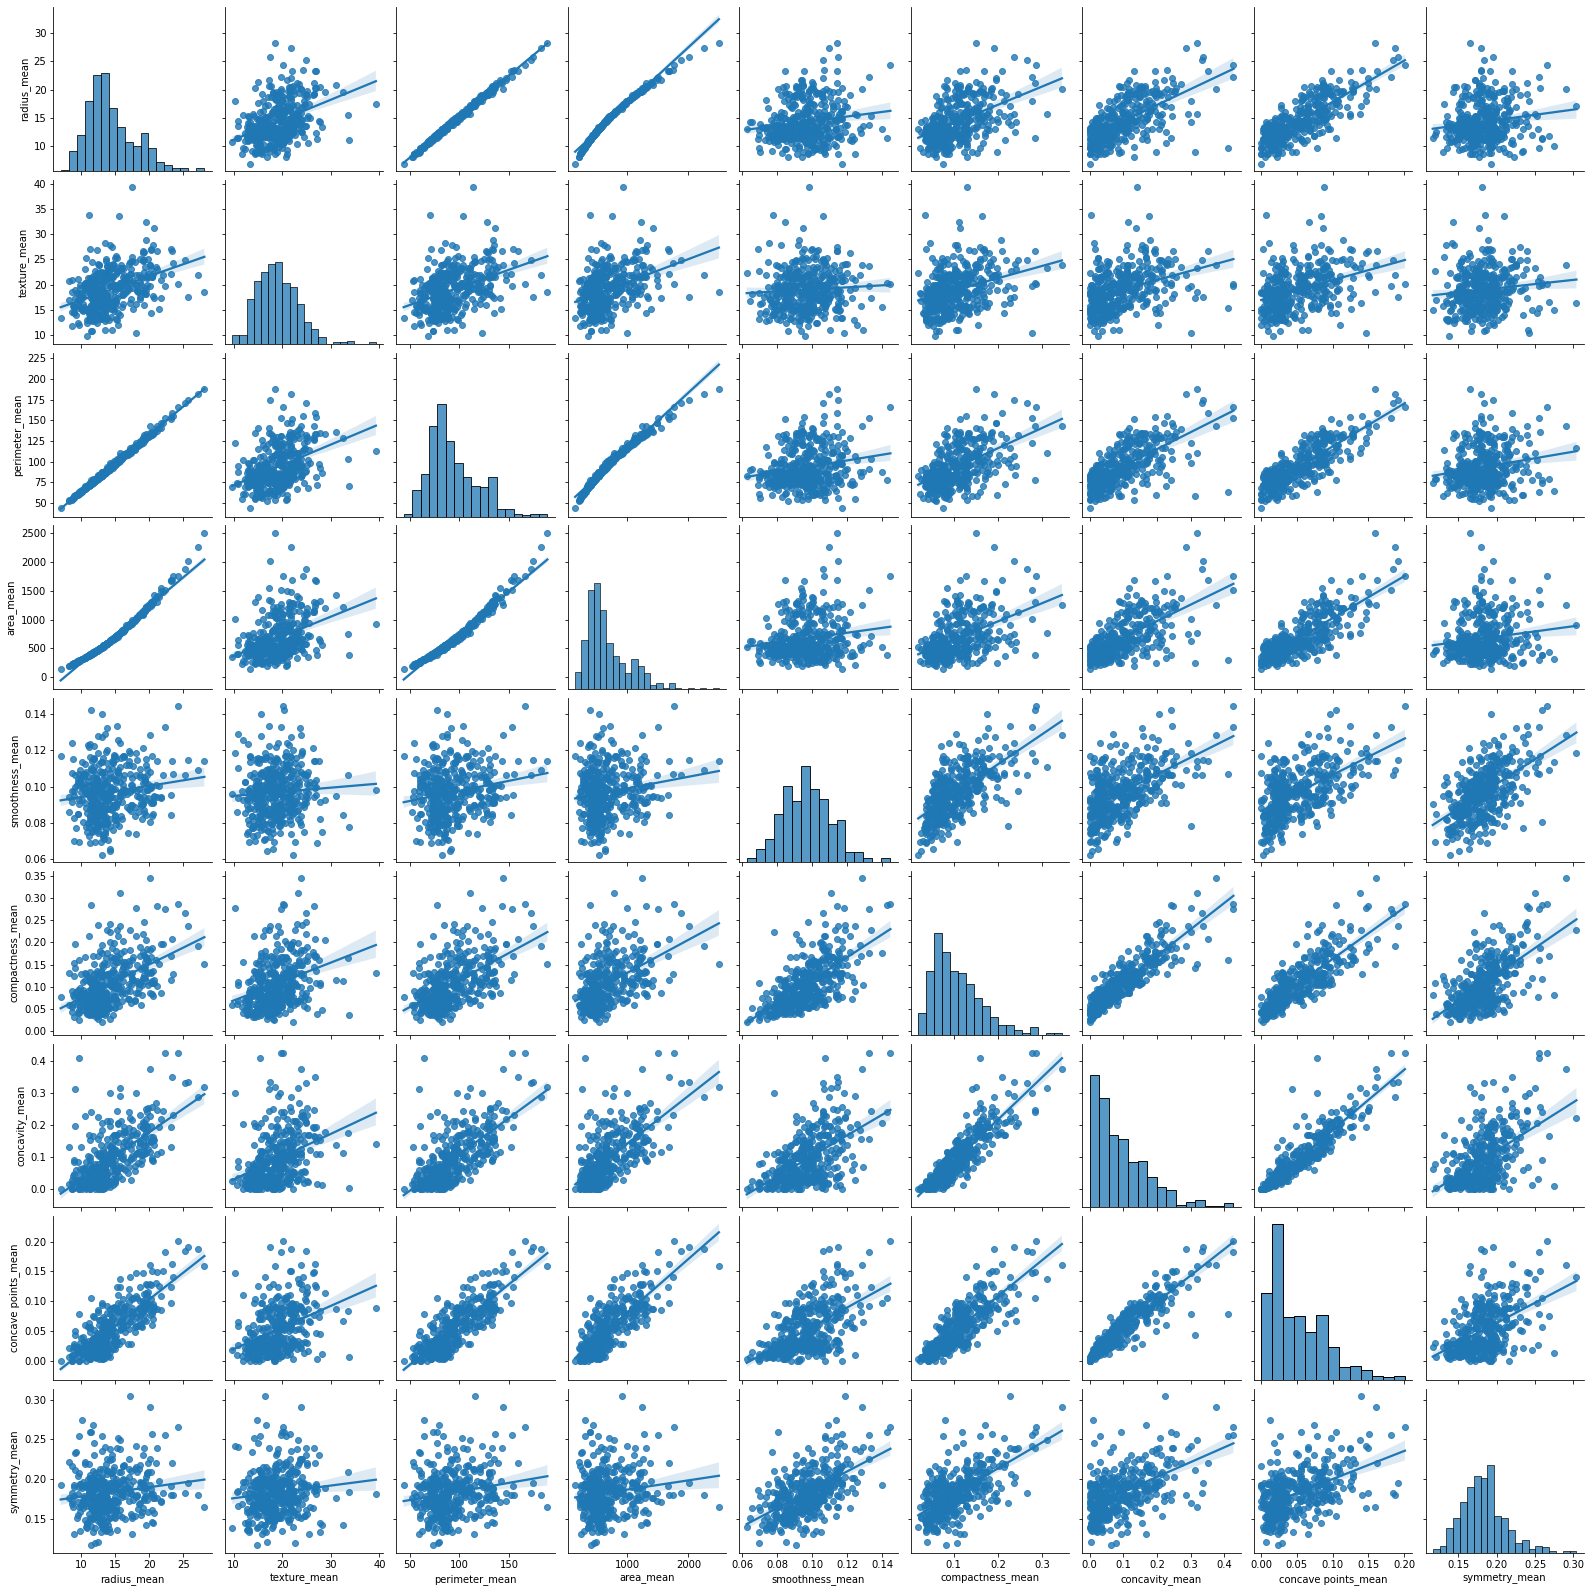

In [ ]:
sns.pairplot(mean_values, kind="reg")
plt.show()

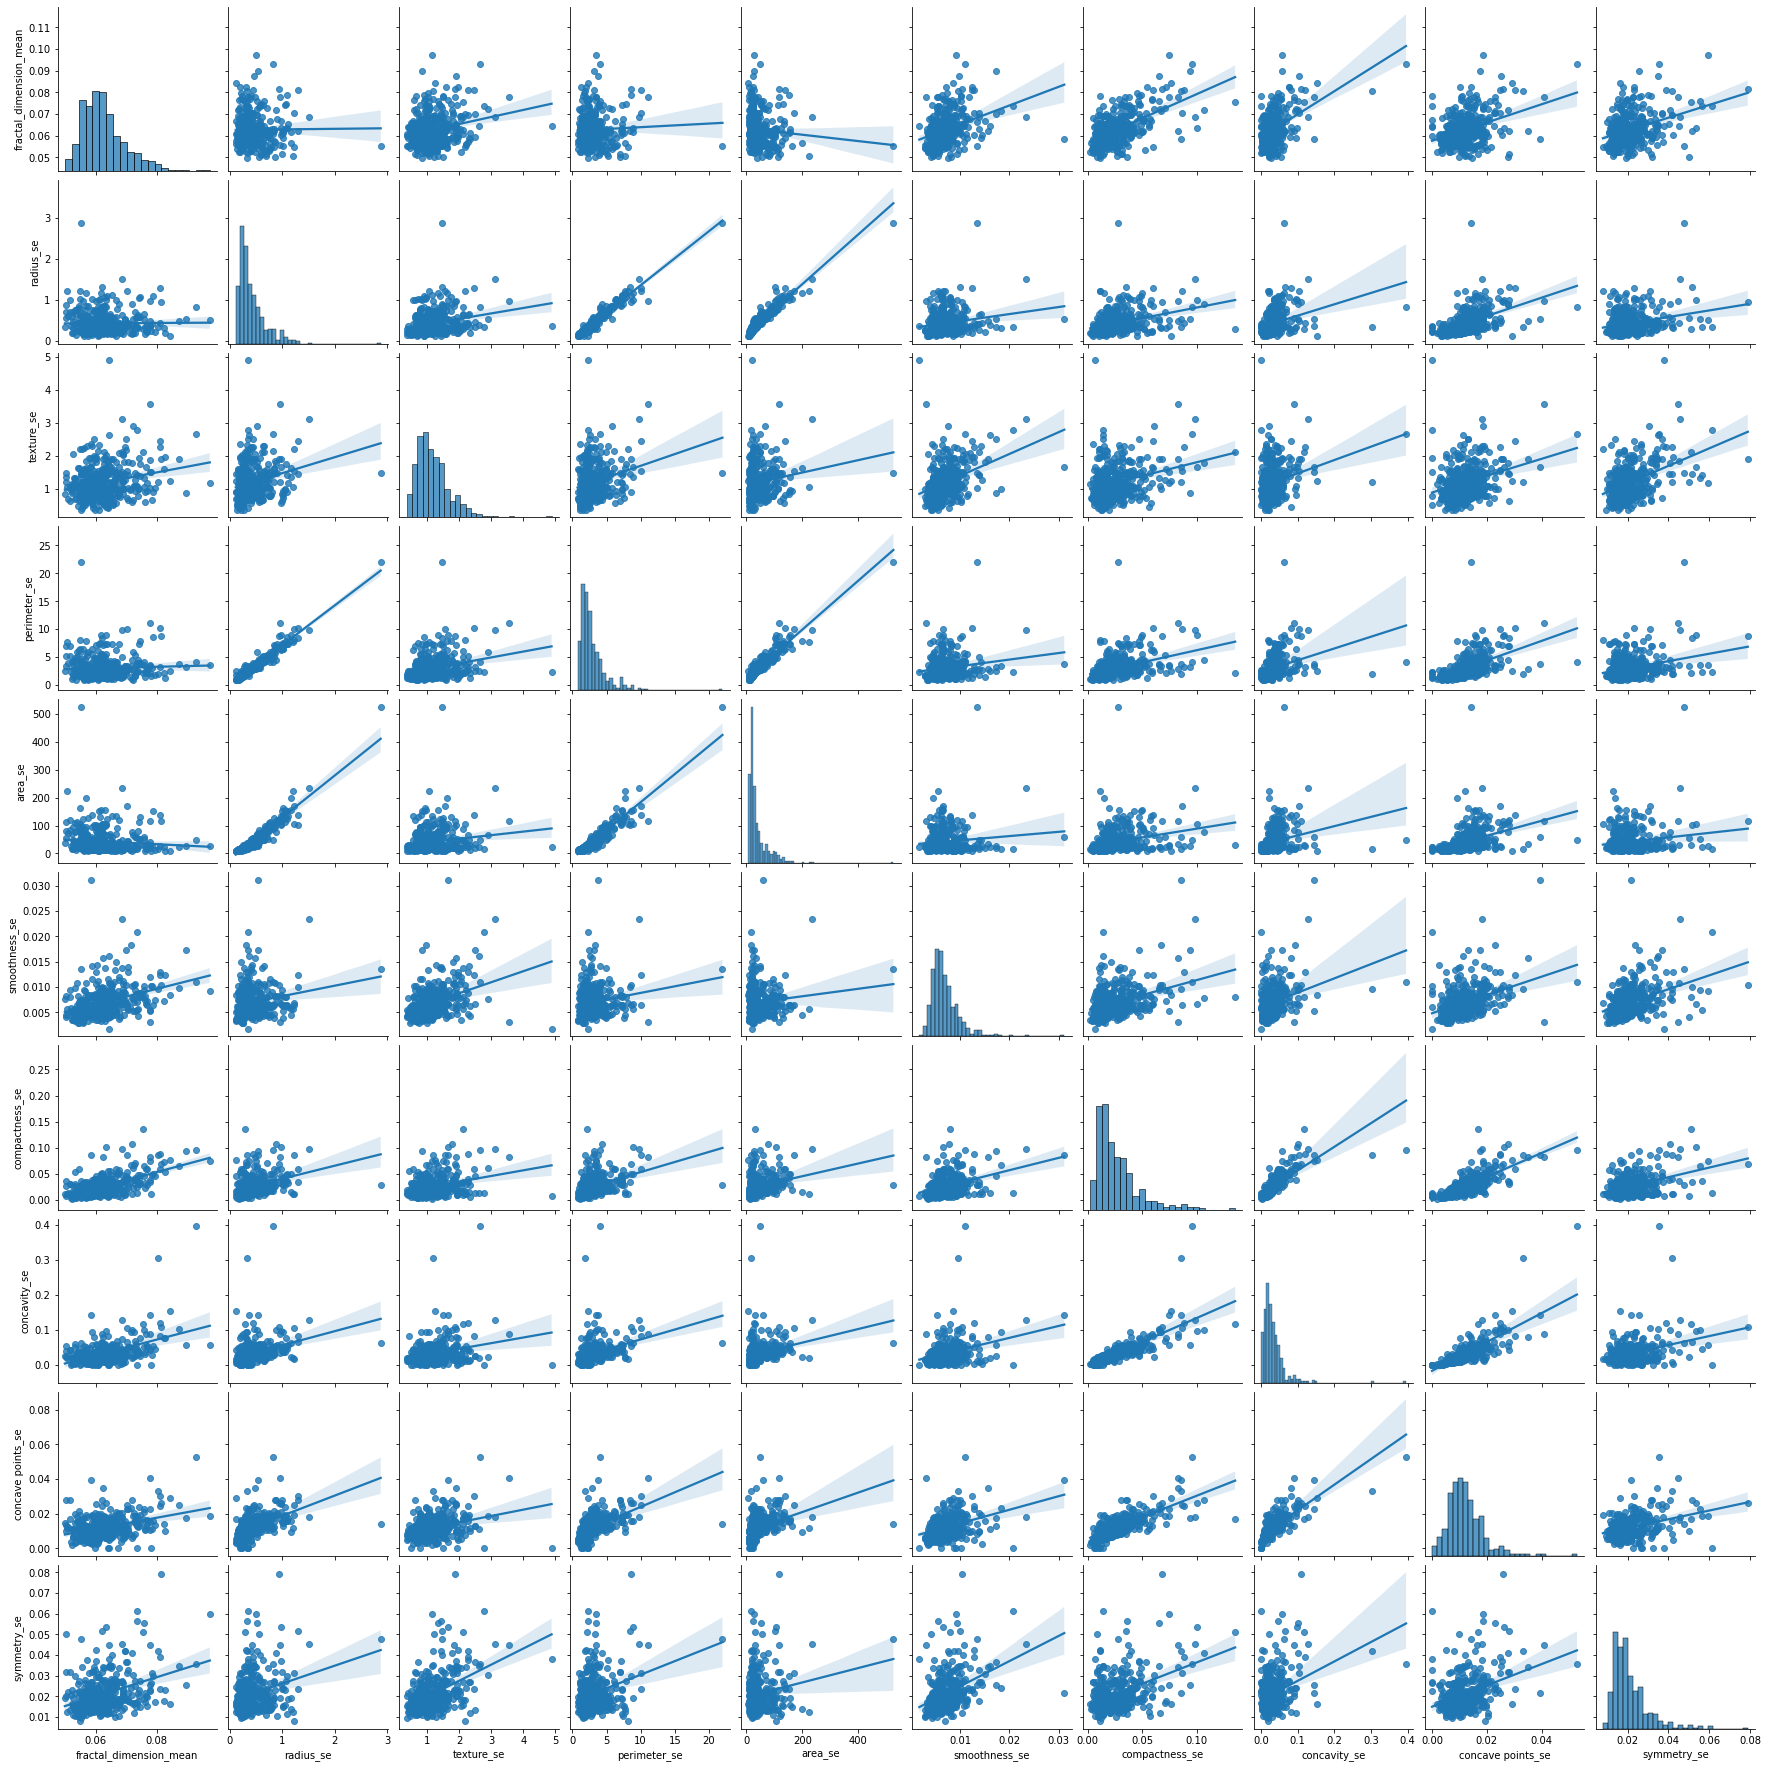

In [ ]:
sns.pairplot(se_values, kind="reg")
plt.show()

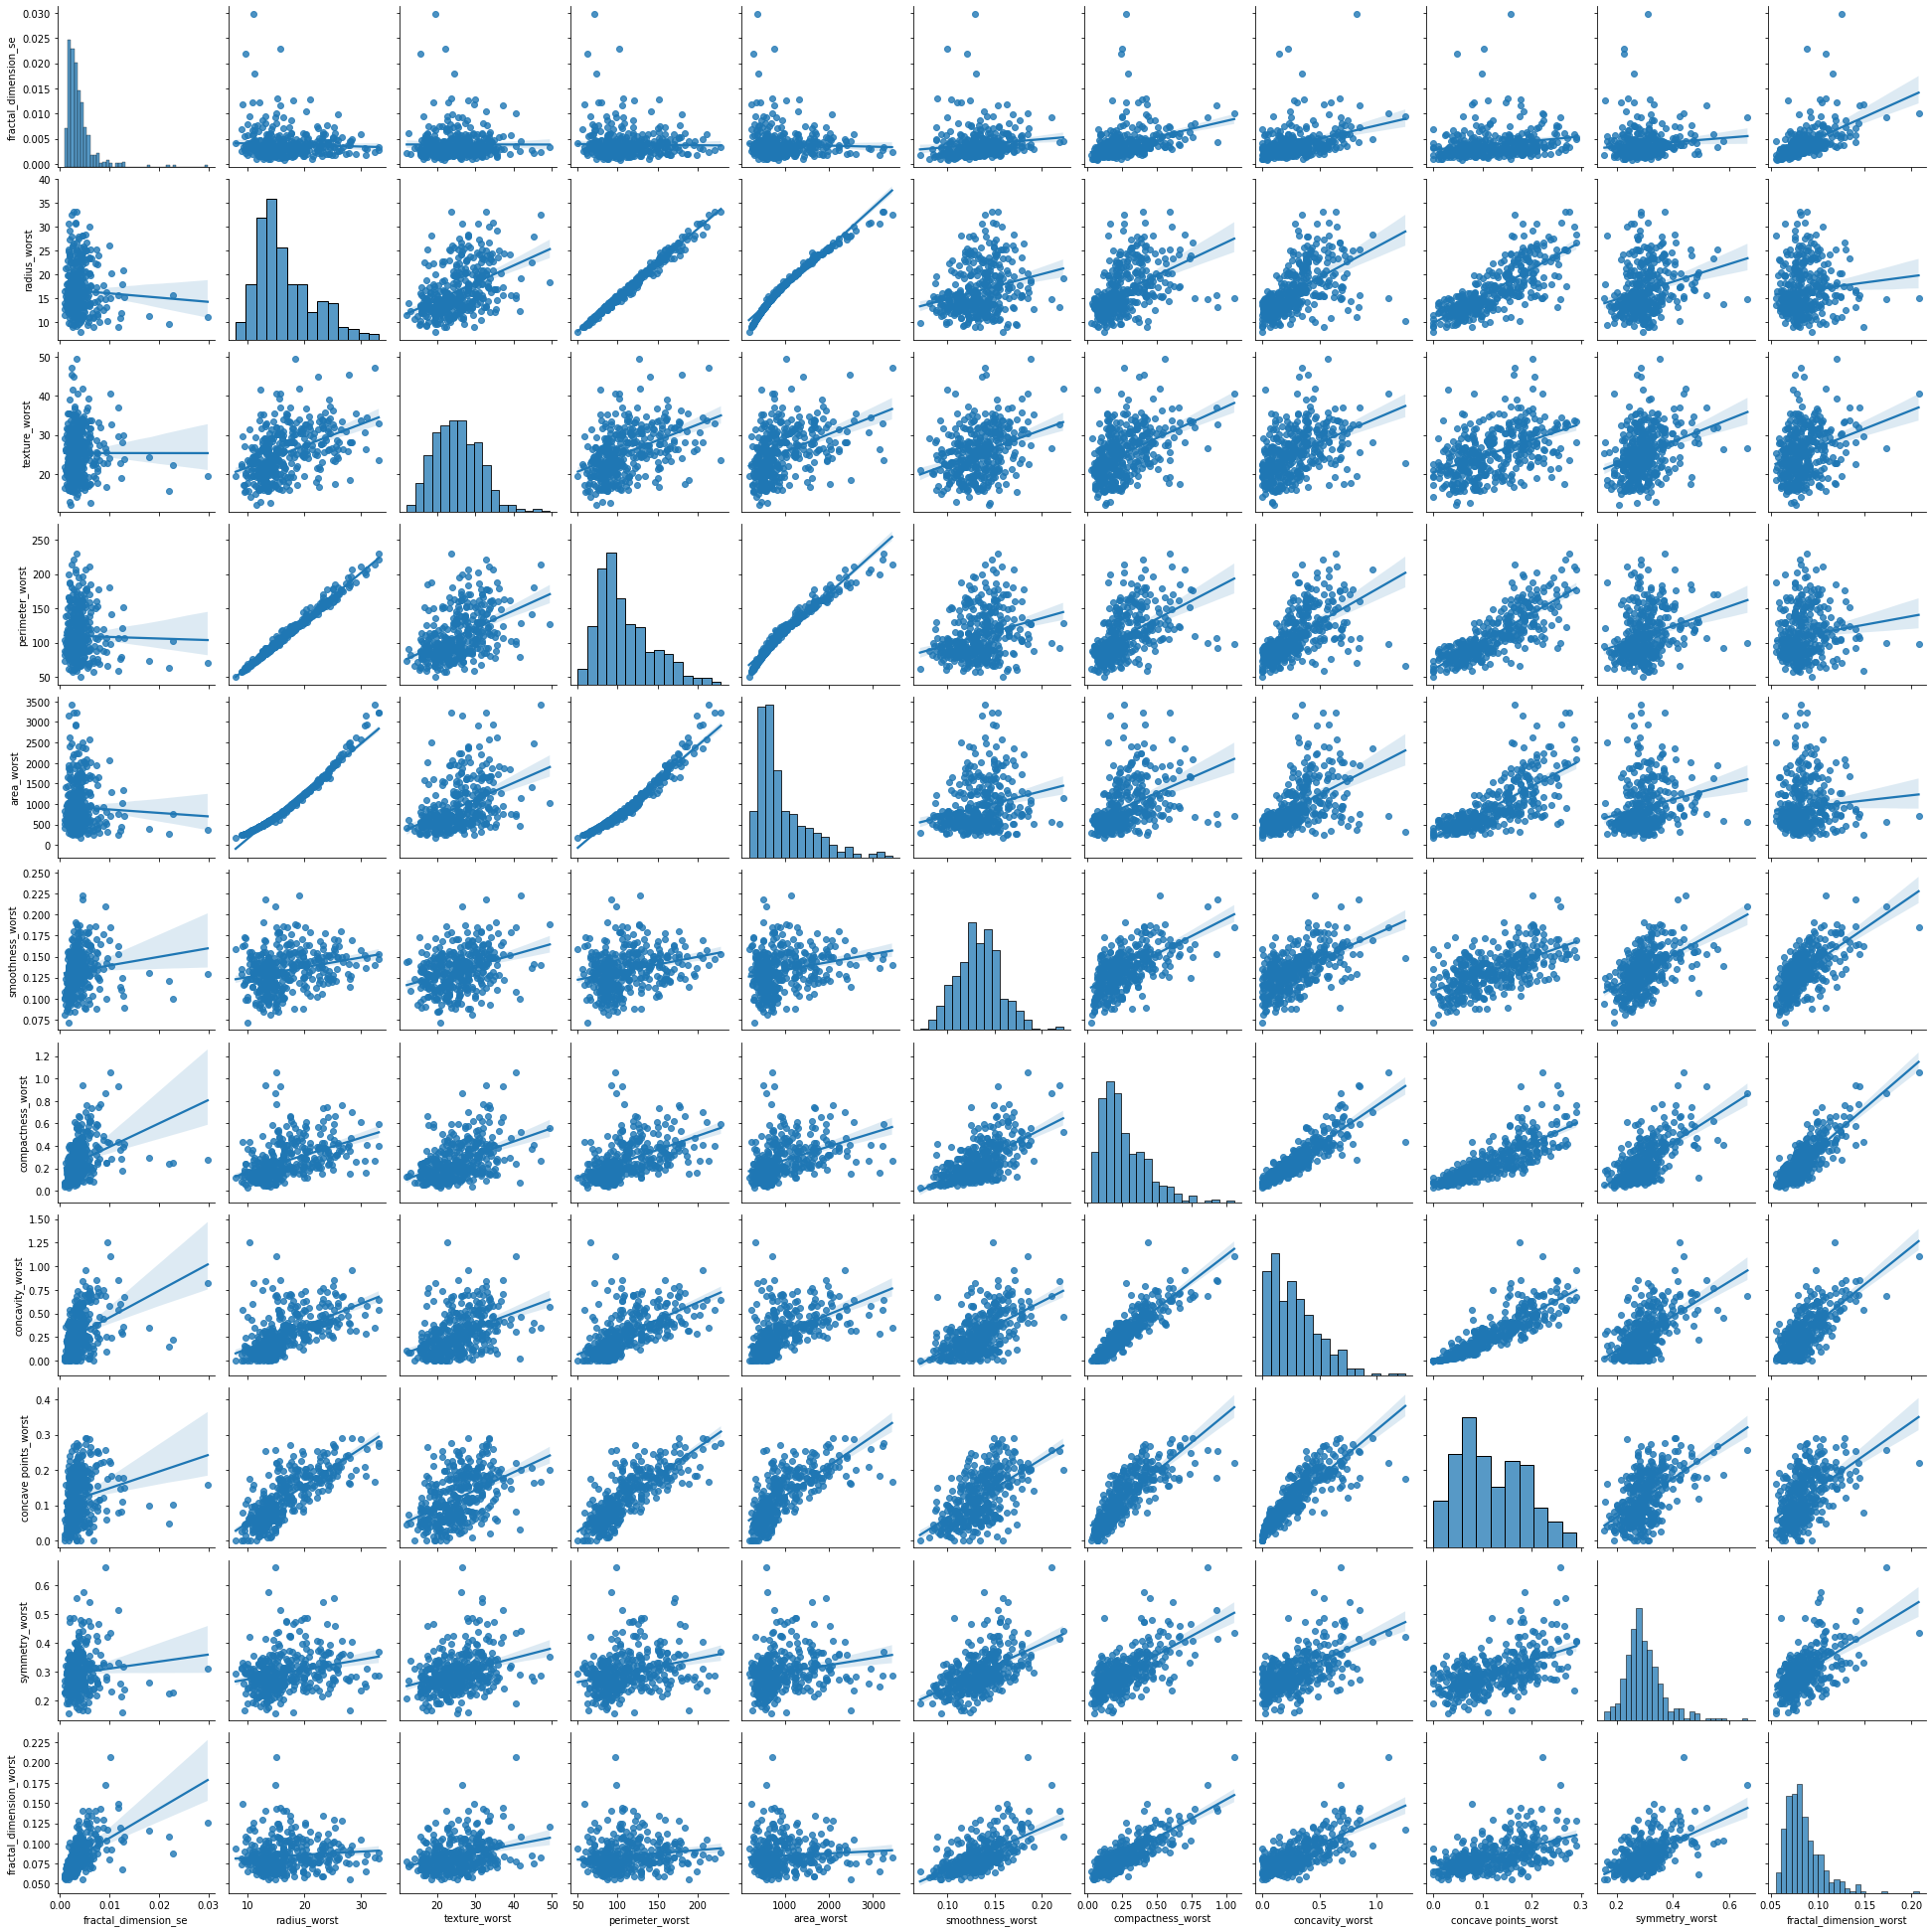

In [ ]:
sns.pairplot(worst_values, kind="reg")
plt.show()

In [ ]:
# Data PreProcessing
# No missing value to dealing with
# Dealing with Outliers
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [ ]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [ ]:
for col in num_cols:
    print(col, check_outlier(df, col))

radius_mean True
texture_mean True
perimeter_mean True
area_mean True
smoothness_mean True
compactness_mean True
concavity_mean True
concave points_mean True
symmetry_mean True
fractal_dimension_mean True
radius_se True
texture_se True
perimeter_se True
area_se True
smoothness_se True
compactness_se True
concavity_se True
concave points_se True
symmetry_se True
fractal_dimension_se True
radius_worst True
texture_worst True
perimeter_worst True
area_worst True
smoothness_worst True
compactness_worst True
concavity_worst True
concave points_worst False
symmetry_worst True
fractal_dimension_worst True


In [ ]:
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

In [ ]:
for col in num_cols:
    print(col, grab_outliers(df, col))

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
82    8611555         M       25.220        24.910         171.500   1878.000            0.106             0.267           0.334                0.184          0.183                   0.068      0.897       1.474         7.382  120.000          0.008           0.057         0.057              0.020        0.011                 0.006        30.000         33.620          211.700    2562.000             0.157              0.608            0.648                 0.287           0.235   
122    865423         M   

In [ ]:
# Local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(df.drop(["diagnosis", "id"], axis=1))

array([ 1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1

In [ ]:
df_scores = clf.negative_outlier_factor_
df_scores[0:5]

array([-1.27126092, -1.07843663, -0.96853952, -1.52761237, -1.04709639])

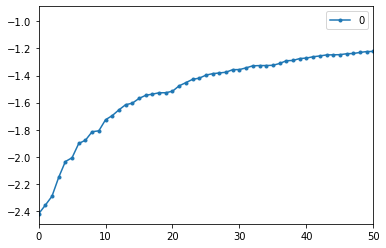

In [ ]:
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 50], style='.-')
plt.show()

In [ ]:
th = np.sort(df_scores)[6]
th

-1.9014855109502988

In [ ]:
df[df_scores < th]

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
101    862722         B        6.981        13.430          43.790    143.500            0.117             0.076           0.000                0.000          0.193                   0.078      0.224       1.508         1.553    9.833          0.010           0.011         0.000              0.000        0.027                 0.004         7.930         19.540           50.410     185.200             0.158              0.120            0.000                 0.000           0.293   
180    873592         M       27.220        21.870         182.100   2250.000            0.109             0.191           0.287                0.188          0.180                   0.058      0.836       1.481         5.820  128.700          0.005           0.025         0.031              0.012        0.016                 0.003        33.120         32.850          220.800    3216.000             0.147              0.403            0.534                 0.269           0.286   
212   8810703         M       28.110        18.470         188.500   2499.000            0.114             0.152           0.320                0.160          0.165                   0.055      2.873       1.476        21.980  525.600          0.013           0.028         0.064              0.014        0.048                 0.004        28.110         18.470          188.500    2499.000             0.114              0.152            0.320                 0.160           0.165   
265  88995002         M       20.730        31.120         135.700   1419.000            0.095             0.114           0.137                0.086          0.177                   0.057      1.172       1.617         7.749  199.700          0.005           0.015         0.021              0.009        0.014                 0.002        32.490         47.160          214.000    3432.000             0.140              0.264            0.344                 0.166           0.287   
352    899987         M       25.730        17.460         174.200   2010.000            0.115             0.236           0.337                0.191          0.196                   0.061      0.995       0.851         7.222  153.100          0.006           0.042         0.043              0.015        0.023                 0.003        33.130         23.580          229.300    3234.000             0.153              0.594            0.645                 0.276           0.369   
368   9011971         M       21.710        17.250         140.900   1546.000            0.094             0.086           0.117                0.085          0.172                   0.051      1.207       1.051         7.733  224.100          0.006           0.011         0.021              0.012        0.013                 0.002        30.750         26.440          199.500    3143.000             0.136              0.163            0.286                 0.182           0.251   

     fractal_dimension_worst  
101                    0.094  
180                    0.081  
212                    0.055  
265                    0.082  
352                    0.088  
368                    0.065

In [ ]:
df[df_scores < th].shape

(6, 32)

In [ ]:
df[df_scores < th].index

Int64Index([101, 180, 212, 265, 352, 368], dtype='int64')

In [ ]:
df[df_scores < th].drop(axis=0, labels=df[df_scores < th].index)
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0    842302         M       17.990        10.380         122.800   1001.000            0.118             0.278           0.300                0.147          0.242                   0.079      1.095       0.905         8.589  153.400          0.006           0.049         0.054              0.016        0.030                 0.006        25.380         17.330          184.600    2019.000             0.162              0.666            0.712                 0.265           0.460   
1    842517         M       20.570        17.770         132.900   1326.000            0.085             0.079           0.087                0.070          0.181                   0.057      0.543       0.734         3.398   74.080          0.005           0.013         0.019              0.013        0.014                 0.004        24.990         23.410          158.800    1956.000             0.124              0.187            0.242                 0.186           0.275   
2  84300903         M       19.690        21.250         130.000   1203.000            0.110             0.160           0.197                0.128          0.207                   0.060      0.746       0.787         4.585   94.030          0.006           0.040         0.038              0.021        0.022                 0.005        23.570         25.530          152.500    1709.000             0.144              0.424            0.450                 0.243           0.361   
3  84348301         M       11.420        20.380          77.580    386.100            0.142             0.284           0.241                0.105          0.260                   0.097      0.496       1.156         3.445   27.230          0.009           0.075         0.057              0.019        0.060                 0.009        14.910         26.500           98.870     567.700             0.210              0.866            0.687                 0.258           0.664   
4  84358402         M       20.290        14.340         135.100   1297.000            0.100             0.133           0.198                0.104          0.181                   0.059      0.757       0.781         5.438   94.440          0.011           0.025         0.057              0.019        0.018                 0.005        22.540         16.670          152.200    1575.000             0.137              0.205            0.400                 0.163           0.236   

   fractal_dimension_worst  
0                    0.119  
1                    0.089  
2                    0.088  
3                    0.173  
4                    0.077

In [ ]:
clf_test = LocalOutlierFactor(n_neighbors=20)
clf_test.fit_predict(test_df.drop(["id"], axis=1))

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1])

In [ ]:
df_test_scores = clf_test.negative_outlier_factor_
df_test_scores[0:5]

array([-0.992866  , -1.01835829, -1.10802169, -1.40651412, -1.4024798 ])

In [ ]:
test_df[df_test_scores < th].drop(axis=0, labels=test_df[df_test_scores < th].index)
test_df.head()

id  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst
0     90312       19.550        23.210         128.900   1174.000            0.101             0.132           0.186                0.102          0.199                   0.059      0.611       2.836         5.383   70.100          0.011           0.041         0.075              0.034        0.028                 0.006        20.820         30.440          142.000    1313.000             0.125              0.241            0.383                 0.182           0.258                    0.076
1  90317302       10.260        12.220          65.750    321.600            0.100             0.075           0.019                0.020          0.180                   0.066      0.191       0.548         1.348   11.880          0.006           0.014         0.008              0.007        0.019                 0.002        11.380         15.650           73.230     394.500             0.134              0.165            0.086                 0.067           0.294                    0.077
2    903483        8.734        16.840          55.270    234.300            0.104             0.074           0.000                0.000          0.199                   0.071      0.517       2.079         3.167   28.850          0.016           0.020         0.000              0.000        0.019                 0.007        10.170         22.800           64.010     317.000             0.146              0.131            0.000                 0.000           0.244                    0.089
3    903507       15.490        19.970         102.400    744.700            0.116             0.156           0.189                0.091          0.193                   0.067      0.647       1.331         4.675   66.910          0.007           0.029         0.050              0.016        0.019                 0.004        21.200         29.410          142.100    1359.000             0.168              0.391            0.555                 0.212           0.319                    0.102
4    903516       21.610        22.280         144.400   1407.000            0.117             0.209           0.281                0.156          0.216                   0.066      0.624       0.921         4.158   80.990          0.005           0.037         0.047              0.013        0.020                 0.004        26.230         28.740          172.000    2081.000             0.150              0.572            0.705                 0.242           0.383                    0.101

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df["diagnosis"] = labelencoder.fit_transform(df["diagnosis"])

In [ ]:
# Data Normalization
scaler = StandardScaler().fit_transform(df[num_cols])
df[num_cols] = pd.DataFrame(scaler, columns=df[num_cols].columns)

In [ ]:
test_df.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
test_cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
             'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 
             'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 
             'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
             'concave points_se', 'symmetry_se', 'fractal_dimension_se', 
             'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 
             'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
test_data = test_df[test_cols]
test_scaled = StandardScaler().fit_transform(test_data)
test_data = pd.DataFrame(test_scaled, columns=test_data.columns)

In [ ]:
y = df["diagnosis"]
x = df.drop(["diagnosis", "id"], axis=1)

In [ ]:
# Model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    stratify=y,
                                                    random_state = 152,
                                                    test_size = 0.2, 
                                                    shuffle = True)

print(f"The shape of x_train is {x_train.shape}")
print(f"The shape of x_test is {x_test.shape}")
print(f"The shape of y_train is {y_train.shape}")
print(f"The shape of y_test is {y_test.shape}")

The shape of x_train is (311, 30)
The shape of x_test is (78, 30)
The shape of y_train is (311,)
The shape of y_test is (78,)


In [ ]:
# LR
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, classifier.predict_proba(x_test)[:,1])
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
metrics = pd.DataFrame({'Metrics': ['Accuracy',
                                          'ROC-AUC',
                                          'Precision',
                                          'Recall'],
                        'Scores': [accuracy, roc_auc, precision, recall]})

In [ ]:
metrics

Metrics  Scores
0   Accuracy   0.962
1    ROC-AUC   0.977
2  Precision   1.000
3     Recall   0.912

[[43  1]
 [ 5 29]]


<AxesSubplot:>

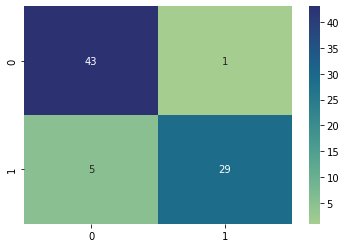

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, cmap="crest")

     Metrics  Scores
0   Accuracy   0.923
1    ROC-AUC   0.978
2  Precision   0.967
3     Recall   0.853
[[43  1]
 [ 5 29]]


<AxesSubplot:>

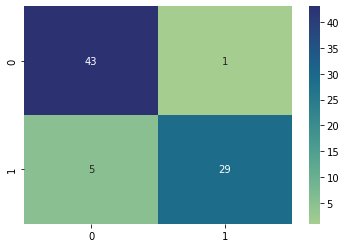

In [ ]:
# KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, classifier.predict_proba(x_test)[:,1])
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
metrics = pd.DataFrame({'Metrics': ['Accuracy',
                                          'ROC-AUC',
                                          'Precision',
                                          'Recall'],
                        'Scores': [accuracy, roc_auc, precision, recall]})
print(metrics)

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, cmap="crest")

     Metrics  Scores
0   Accuracy   0.897
1    ROC-AUC   0.896
2  Precision   0.882
3     Recall   0.882
[[40  4]
 [ 4 30]]


<AxesSubplot:>

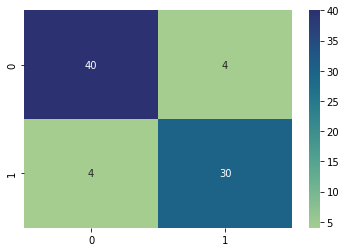

In [ ]:
# DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, classifier.predict_proba(x_test)[:,1])
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
metrics = pd.DataFrame({'Metrics': ['Accuracy',
                                          'ROC-AUC',
                                          'Precision',
                                          'Recall'],
                        'Scores': [accuracy, roc_auc, precision, recall]})
print(metrics)

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, cmap="crest")

     Metrics  Scores
0   Accuracy   0.936
1    ROC-AUC   0.979
2  Precision   0.914
3     Recall   0.941
[[41  3]
 [ 2 32]]


<AxesSubplot:>

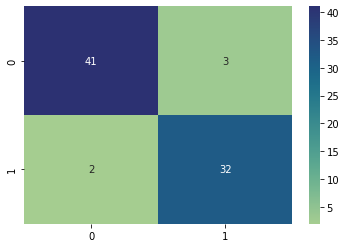

In [ ]:
# RandomForestClassifier()
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, classifier.predict_proba(x_test)[:,1])
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
metrics = pd.DataFrame({'Metrics': ['Accuracy',
                                          'ROC-AUC',
                                          'Precision',
                                          'Recall'],
                        'Scores': [accuracy, roc_auc, precision, recall]})
print(metrics)

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, cmap="crest")

     Metrics  Scores
0   Accuracy   0.897
1    ROC-AUC   0.889
2  Precision   0.933
3     Recall   0.824
[[42  2]
 [ 6 28]]


<AxesSubplot:>

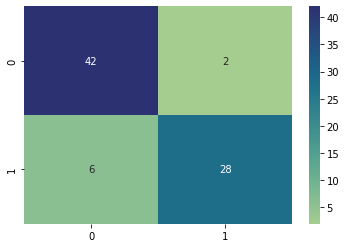

In [ ]:
# AdaBoostClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, classifier.predict_proba(x_test)[:,1])
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
metrics = pd.DataFrame({'Metrics': ['Accuracy',
                                          'ROC-AUC',
                                          'Precision',
                                          'Recall'],
                        'Scores': [accuracy, roc_auc, precision, recall]})
print(metrics)

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, cmap="crest")

     Metrics  Scores
0   Accuracy   0.962
1    ROC-AUC   0.964
2  Precision   0.970
3     Recall   0.941
[[43  1]
 [ 2 32]]


<AxesSubplot:>

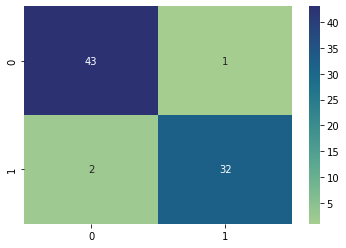

In [ ]:
# GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, classifier.predict_proba(x_test)[:,1])
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
metrics = pd.DataFrame({'Metrics': ['Accuracy',
                                          'ROC-AUC',
                                          'Precision',
                                          'Recall'],
                        'Scores': [accuracy, roc_auc, precision, recall]})
print(metrics)

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, cmap="crest")

     Metrics  Scores
0   Accuracy   0.974
1    ROC-AUC   0.964
2  Precision   1.000
3     Recall   0.941
[[44  0]
 [ 2 32]]


<AxesSubplot:>

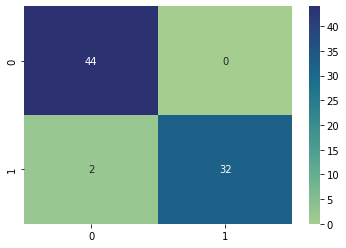

In [ ]:
# XGBClassifier
classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, classifier.predict_proba(x_test)[:,1])
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
metrics = pd.DataFrame({'Metrics': ['Accuracy',
                                          'ROC-AUC',
                                          'Precision',
                                          'Recall'],
                        'Scores': [accuracy, roc_auc, precision, recall]})
print(metrics)

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, cmap="crest")

     Metrics  Scores
0   Accuracy   0.962
1    ROC-AUC   0.974
2  Precision   0.970
3     Recall   0.941
[[43  1]
 [ 2 32]]


<AxesSubplot:>

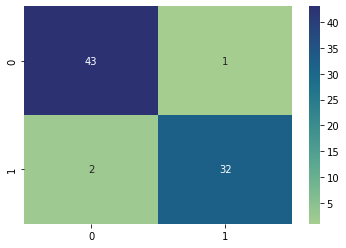

In [ ]:
# LGBMClassifier
classifier = LGBMClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, classifier.predict_proba(x_test)[:,1])
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
metrics = pd.DataFrame({'Metrics': ['Accuracy',
                                          'ROC-AUC',
                                          'Precision',
                                          'Recall'],
                        'Scores': [accuracy, roc_auc, precision, recall]})
print(metrics)

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, cmap="crest")

     Metrics  Scores
0   Accuracy   0.962
1    ROC-AUC   0.975
2  Precision   0.970
3     Recall   0.941
[[43  1]
 [ 2 32]]


<AxesSubplot:>

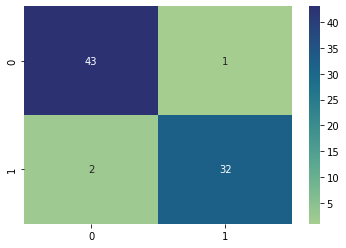

In [ ]:
# CatBoostClassifier
classifier = CatBoostClassifier(verbose=False)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, classifier.predict_proba(x_test)[:,1])
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
metrics = pd.DataFrame({'Metrics': ['Accuracy',
                                          'ROC-AUC',
                                          'Precision',
                                          'Recall'],
                        'Scores': [accuracy, roc_auc, precision, recall]})
print(metrics)

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, cmap="crest")

In [ ]:
submission_df.head()

id diagnosis
0   1         B
1   2         B
2   3         M
3   4         M
4   5         M

In [ ]:
# Test Data
# XGBClassifier
classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
classifier.fit(x_train, y_train)
test_predictions = classifier.predict(test_data)

In [ ]:
test_predictions

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0])

In [ ]:
output = pd.DataFrame({'id': test_df["id"],
                       'diagnosis': test_predictions})
output["diagnosis"] = output['diagnosis'].map({0:'B',1:'M'})
output.to_csv('submission.csv', index=False)